In [1]:
# install.packages("BiocManager")
# install.packages("forcats")
# install.packages("stringr")
# install.packages("ggplot2")
# install.packages("ggrepel")
# install.packages("readr")
# install.packages("tidyr")
# install.packages("survminer")
# BiocManager::install("GEOquery")
# BiocManager::install("limma")
# BiocManager::install("pheatmap")
# BiocManager::install("org.Hs.eg.db")
# BiocManager::install("umap")
# devtools::install_github("yanlinlin82/ggvenn")
# BiocManager::install("marray")

In [3]:
library(GEOquery)
library(dplyr)
library(pheatmap)
library(ggplot2)
library(ggrepel)
library(ggrepel)
library(limma)
library(umap)

In [4]:
gset <- getGEO("GSE109887", GSEMatrix =TRUE, AnnotGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL10904", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]
# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

Found 1 file(s)

GSE109887_series_matrix.txt.gz



In [5]:
head(pData(gset)) ## print the sample information
head(fData(gset)) ## print the gene annotation
head(exprs(gset)) ## print the expression data

title       geo_accession status                submission_date
GSM2973262 MTG_AD_rep1 GSM2973262    Public on Dec 09 2019 Jan 30 2018    
GSM2973263 MTG_AD_rep2 GSM2973263    Public on Dec 09 2019 Jan 30 2018    
GSM2973264 MTG_AD_rep3 GSM2973264    Public on Dec 09 2019 Jan 30 2018    
GSM2973265 MTG_AD_rep4 GSM2973265    Public on Dec 09 2019 Jan 30 2018    
GSM2973266 MTG_AD_rep5 GSM2973266    Public on Dec 09 2019 Jan 30 2018    
GSM2973267 MTG_AD_rep6 GSM2973267    Public on Dec 09 2019 Jan 30 2018    
           last_update_date type channel_count source_name_ch1          
GSM2973262 Dec 09 2019      RNA  1             middle temporal gyrus, AD
GSM2973263 Dec 09 2019      RNA  1             middle temporal gyrus, AD
GSM2973264 Dec 09 2019      RNA  1             middle temporal gyrus, AD
GSM2973265 Dec 09 2019      RNA  1             middle temporal gyrus, AD
GSM2973266 Dec 09 2019      RNA  1             middle temporal gyrus, AD
GSM2973267 Dec 09 2019      RNA  1             middle temporal gyrus, AD
           organism_ch1 characteristics_ch1 ⋯ contact_address     contact_city
GSM2973262 Homo sapiens gender: Male        ⋯ Robert-Koch-Str. 40 Göttingen   
GSM2973263 Homo sapiens gender: Male        ⋯ Robert-Koch-Str. 40 Göttingen   
GSM2973264 Homo sapiens gender: Female      ⋯ Robert-Koch-Str. 40 Göttingen   
GSM2973265 Homo sapiens gender: Female      ⋯ Robert-Koch-Str. 40 Göttingen   
GSM2973266 Homo sapiens gender: Male        ⋯ Robert-Koch-Str. 40 Göttingen   
GSM2973267 Homo sapiens gender: Male        ⋯ Robert-Koch-Str. 40 Göttingen   
           contact_zip/postal_code contact_country supplementary_file
GSM2973262 37075                   Germany         NONE              
GSM2973263 37075                   Germany         NONE              
GSM2973264 37075                   Germany         NONE              
GSM2973265 37075                   Germany         NONE              
GSM2973266 37075                   Germany         NONE              
GSM2973267 37075                   Germany         NONE              
           data_row_count age:ch1 disease state:ch1 gender:ch1
GSM2973262 31700          91      AD                Male      
GSM2973263 31700          87      AD                Male      
GSM2973264 31700          82      AD                Female    
GSM2973265 31700          73      AD                Female    
GSM2973266 31700          94      AD                Male      
GSM2973267 31700          72      AD                Male      
           tissue:ch1                  
GSM2973262 brain, middle temporal gyrus
GSM2973263 brain, middle temporal gyrus
GSM2973264 brain, middle temporal gyrus
GSM2973265 brain, middle temporal gyrus
GSM2973266 brain, middle temporal gyrus
GSM2973267 brain, middle temporal gyrus

ID    ORF   SPOT_ID
7A5   7A5   7A5          
A1BG  A1BG  A1BG         
A1CF  A1CF  A1CF         
A26C3 A26C3 A26C3        
A2BP1 A2BP1 A2BP1        
A2M   A2M   A2M

GSM2973262 GSM2973263 GSM2973264 GSM2973265 GSM2973266 GSM2973267
7A5    6.436441   6.500922   6.513507   6.480839   6.478978   6.509372 
A1BG   6.736136   6.649034   6.612224   6.559642   6.574546   6.471425 
A1CF   6.545395   6.479783   6.588104   6.482503   6.466453   6.442931 
A26C3  6.529725   6.504956   6.531813   6.549229   6.458589   6.602654 
A2BP1  6.773307   7.675723   7.159857   7.334894   7.928057   7.427863 
A2M   11.253437  10.758069  10.790378  11.280206  10.550165  11.015546 
      GSM2973268 GSM2973269 GSM2973270 GSM2973271 ⋯ GSM2973330 GSM2973331
7A5    6.558079   6.539648   6.476178   6.384209  ⋯ 6.462642    6.536339 
A1BG   6.601043   6.680376   6.619720   6.695035  ⋯ 6.667337    6.551605 
A1CF   6.448482   6.511453   6.537003   6.485914  ⋯ 6.540705    6.491767 
A26C3  6.551262   6.618060   6.473897   6.475091  ⋯ 6.557970    6.505190 
A2BP1  7.753590   7.542770   6.962004   7.844319  ⋯ 8.141308    8.334120 
A2M   10.374510  10.232084  11.219453  10.558733  ⋯ 9.642897   10.061636 
      GSM2973332 GSM2973333 GSM2973334 GSM2973335 GSM2973336 GSM2973337
7A5    6.506450   6.429433   6.427672   6.488852   6.503583   6.508713 
A1BG   6.557762   6.600702   6.648831   6.660864   6.617121   6.541810 
A1CF   6.479403   6.535446   6.487697   6.515856   6.546361   6.457605 
A26C3  6.585256   6.594342   6.523304   6.526753   6.492019   6.623703 
A2BP1  8.201316   7.891050   8.061283   7.794727   7.156839   6.903667 
A2M   11.116617  10.779104  10.415084  10.889901  11.026483  10.926880 
      GSM2973338 GSM2973339
7A5   6.442999    6.465497 
A1BG  6.547078    6.611912 
A1CF  6.469584    6.521874 
A26C3 6.467831    6.453058 
A2BP1 8.187274    7.777883 
A2M   9.636975   10.613131

In [6]:
# summary(exprs(gse))
# ## calculate median expression level
# cutoff <- median(exprs(gse))
# ## TRUE or FALSE for whether each gene is "expressed" in each sample
# is_expressed <- exprs(gse) > cutoff

# ## Identify genes expressed in more than 2 samples
# keep <- rowSums(is_expressed) > 2
# ## check how many genes are removed / retained.
# table(keep)
# ## subset to just those expressed genes
# gse <- gse[keep,]

In [7]:
anno <- fData(gset)
data <- exprs(gset)
sampleMeta <- pData(gset)

In [8]:
tryCatch({
        print(length(unique(anno$GENE_SYMBOL)))
        print(length(anno[,1]))

        counts <- dplyr::count(anno, GENE_SYMBOL, sort=TRUE)
        head(counts[counts$n != 1,])

        uniqueGenes = counts[counts$n == 1,]$GENE_SYMBOL

        data <- data[anno$GENE_SYMBOL %in% uniqueGenes,]
        anno <- anno[anno$GENE_SYMBOL %in% uniqueGenes,]
        rownames(data) <- anno$GENE_SYMBOL
        data <- log2(data)
    },
    error=function(cond) {
        print('No GENE_SYMBOL presented')
})

anno <- tryCatch({
        tmp <- select(anno, GENE_SYMBOL)
        rename(tmp, ID=GENE_SYMBOL)
    },
    error=function(cond) {
        return(select(anno, ID))
})

[1] 0
[1] 31700
[1] "No GENE_SYMBOL presented"


In [9]:
sampleInfo <- tryCatch(
    {
        sampleInfo <- select(sampleMeta, `gender:ch1`, `disease state:ch1`, `age:ch1`)
        sampleInfo <- rename(
            sampleInfo,
            gender=`gender:ch1`, condition=`disease state:ch1`, above82=`age:ch1`)
        sampleInfo$above82 <- as.numeric(sampleInfo$above82 > 82)
        sampleInfo
    },
    error=function(cond) {
        sampleInfo <- select(sampleMeta, `gender:ch1`, `disease:ch1`)
        sampleInfo <- rename(
            sampleInfo,
            gender=`gender:ch1`, condition=`disease:ch1`)
        return(sampleInfo)
    })

head(sampleInfo)

gender condition above82
GSM2973262 Male   AD        1      
GSM2973263 Male   AD        1      
GSM2973264 Female AD        0      
GSM2973265 Female AD        0      
GSM2973266 Male   AD        1      
GSM2973267 Male   AD        0

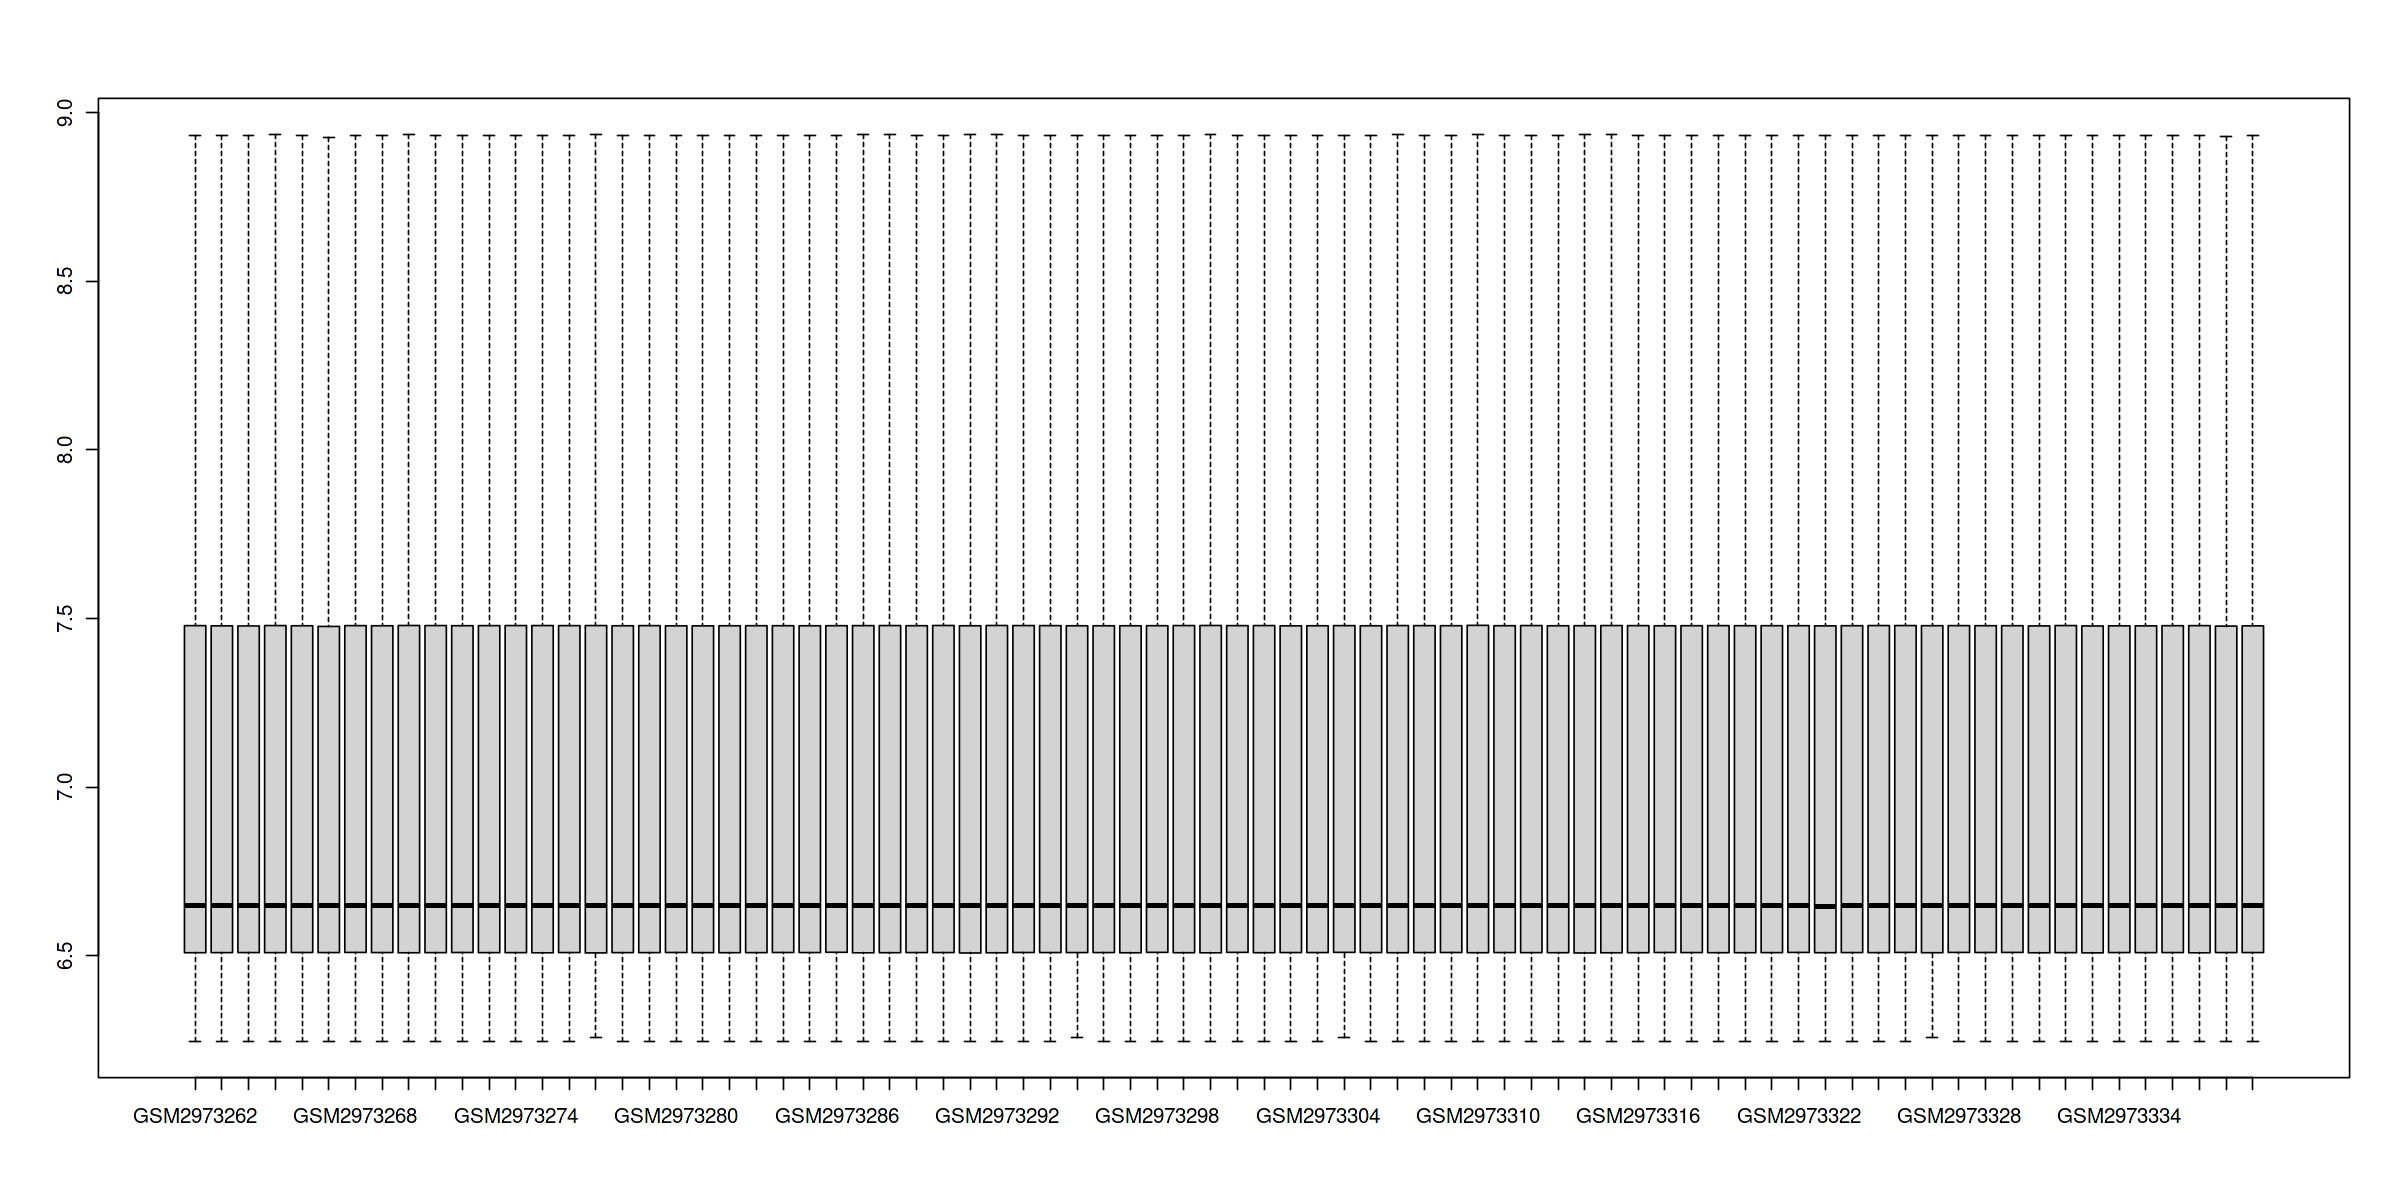

In [10]:
## exprs get the expression levels as a data frame and get the distribution
options(repr.plot.width=20, repr.plot.height=10)
boxplot(data,outline=FALSE)

### Data not in $log_2$ scale

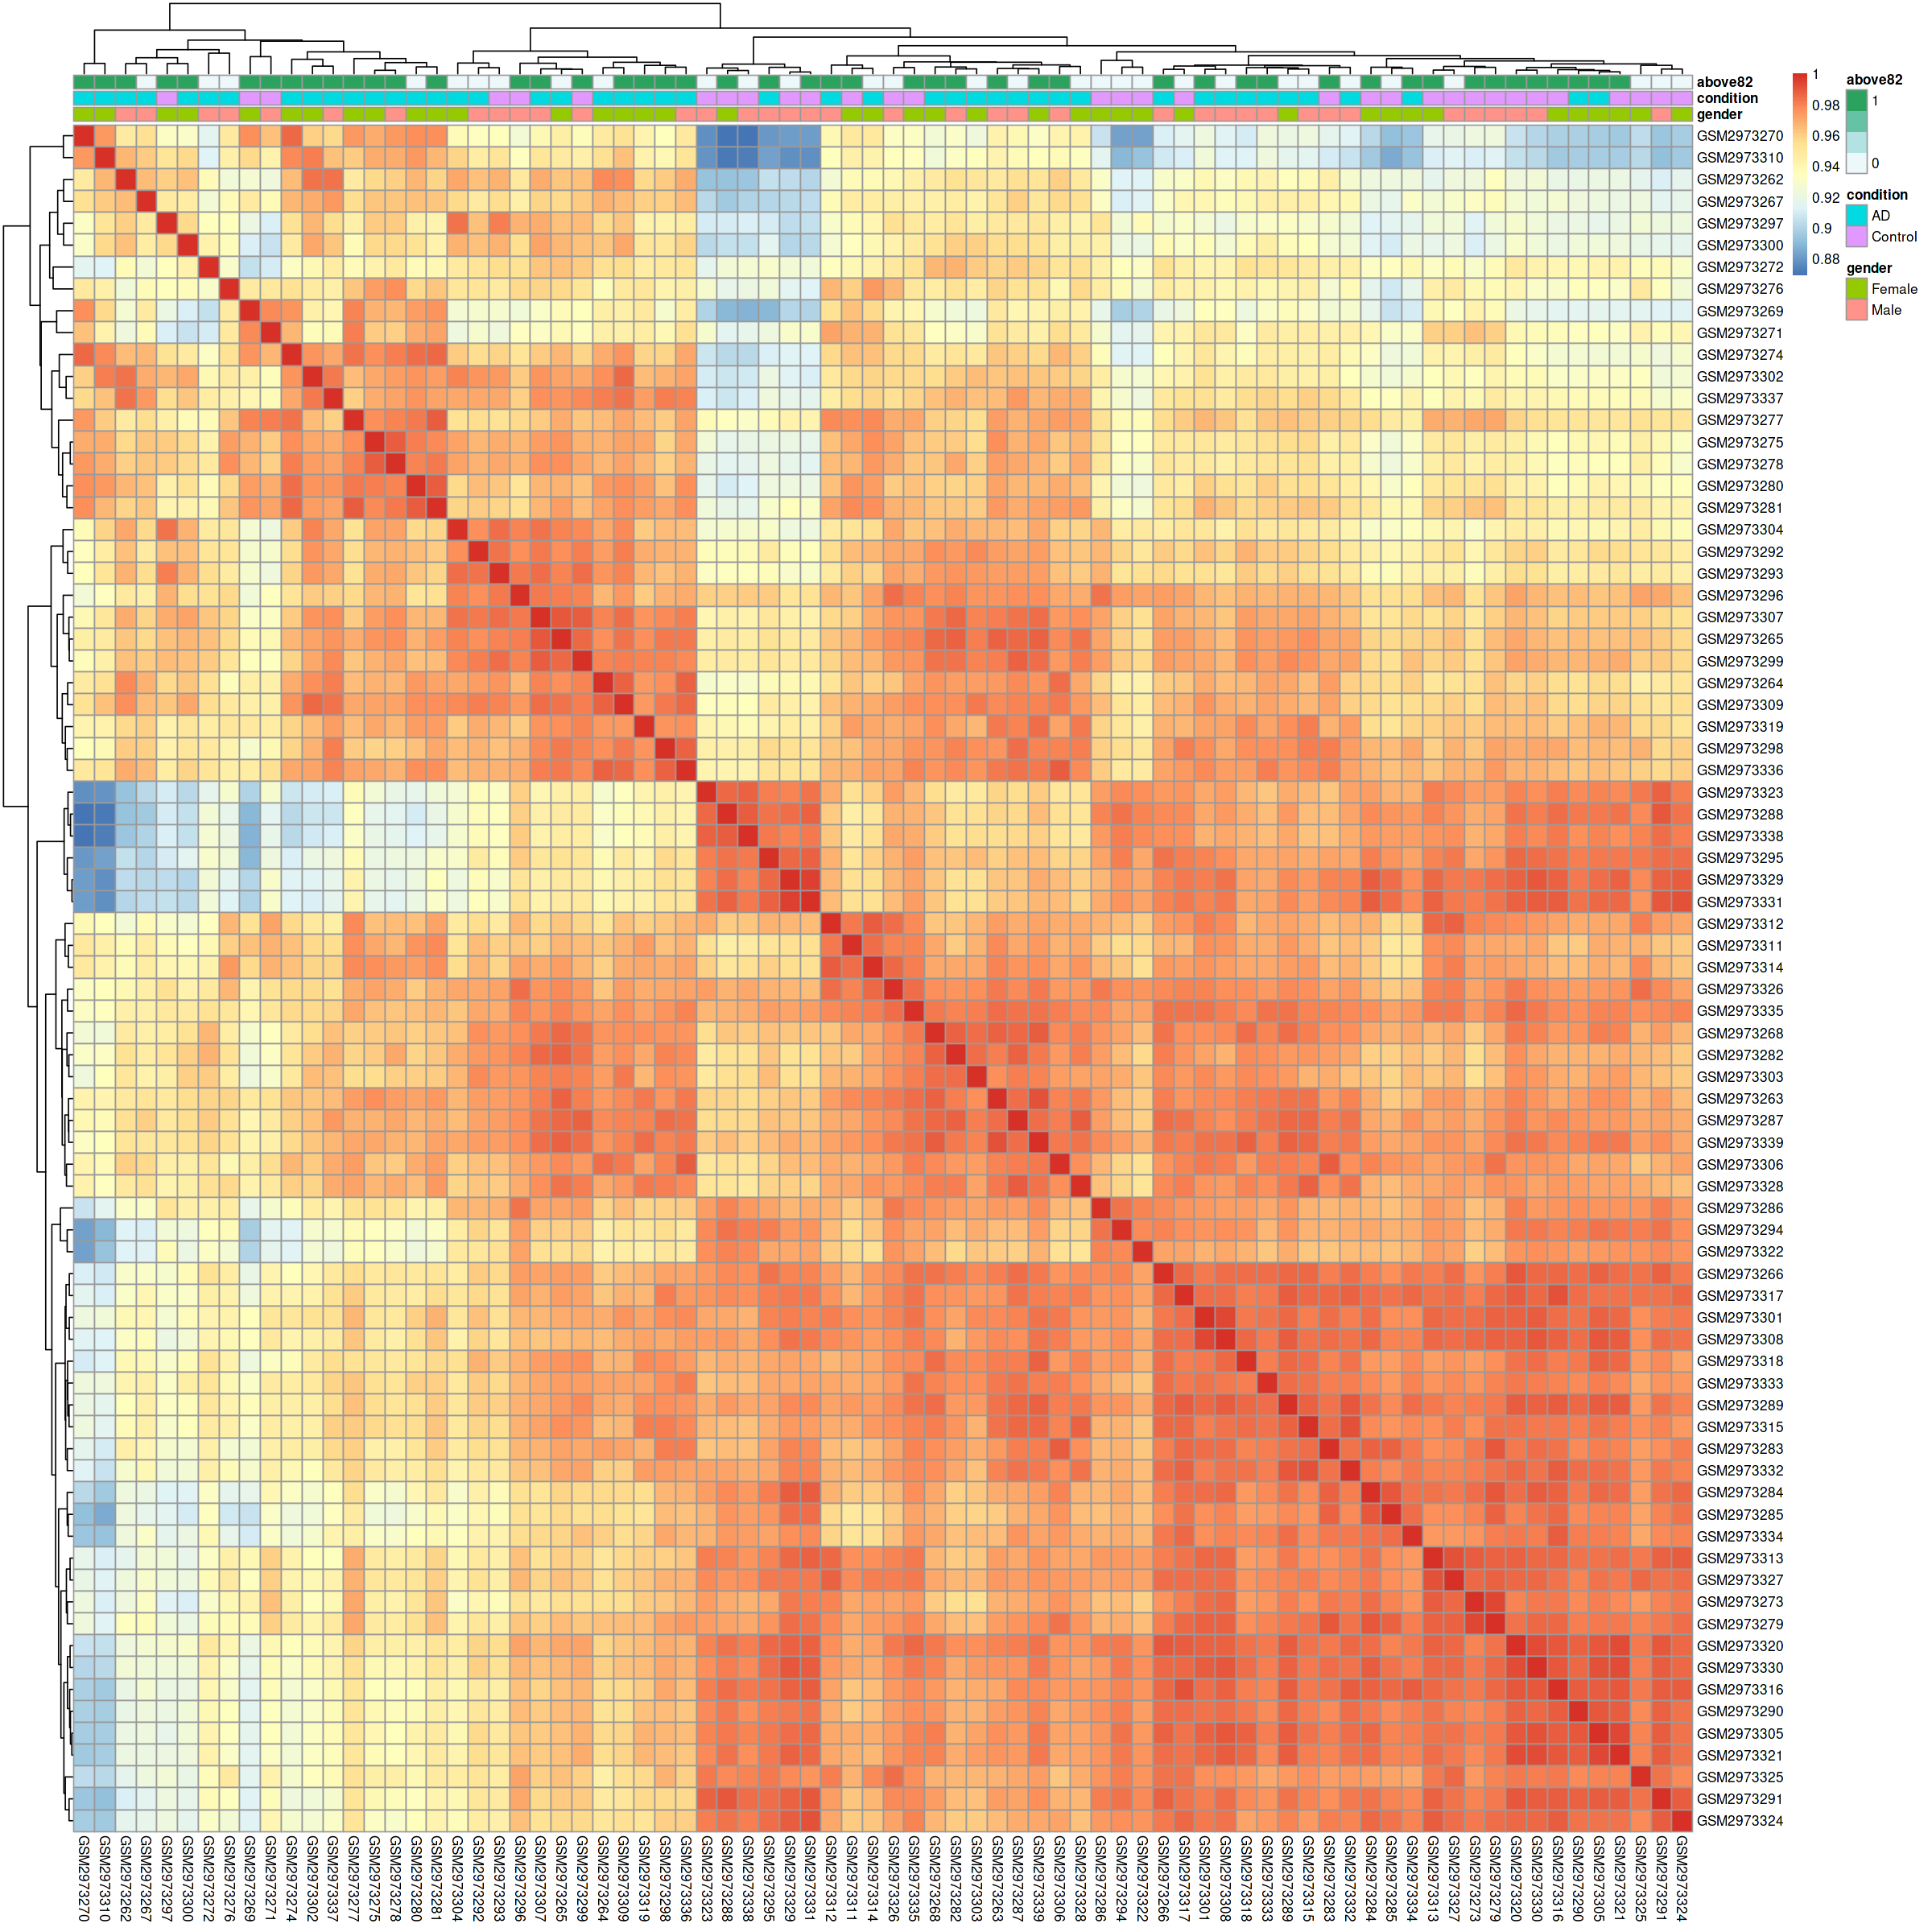

In [11]:
options(repr.plot.width=20, repr.plot.height=20)
corMatrix <- cor(data, use="c")
rownames(sampleInfo) <- colnames(corMatrix)
pheatmap(corMatrix,
         annotation_col=sampleInfo)

In [11]:
sampleInfo$rname <- row.names(sampleInfo)

Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


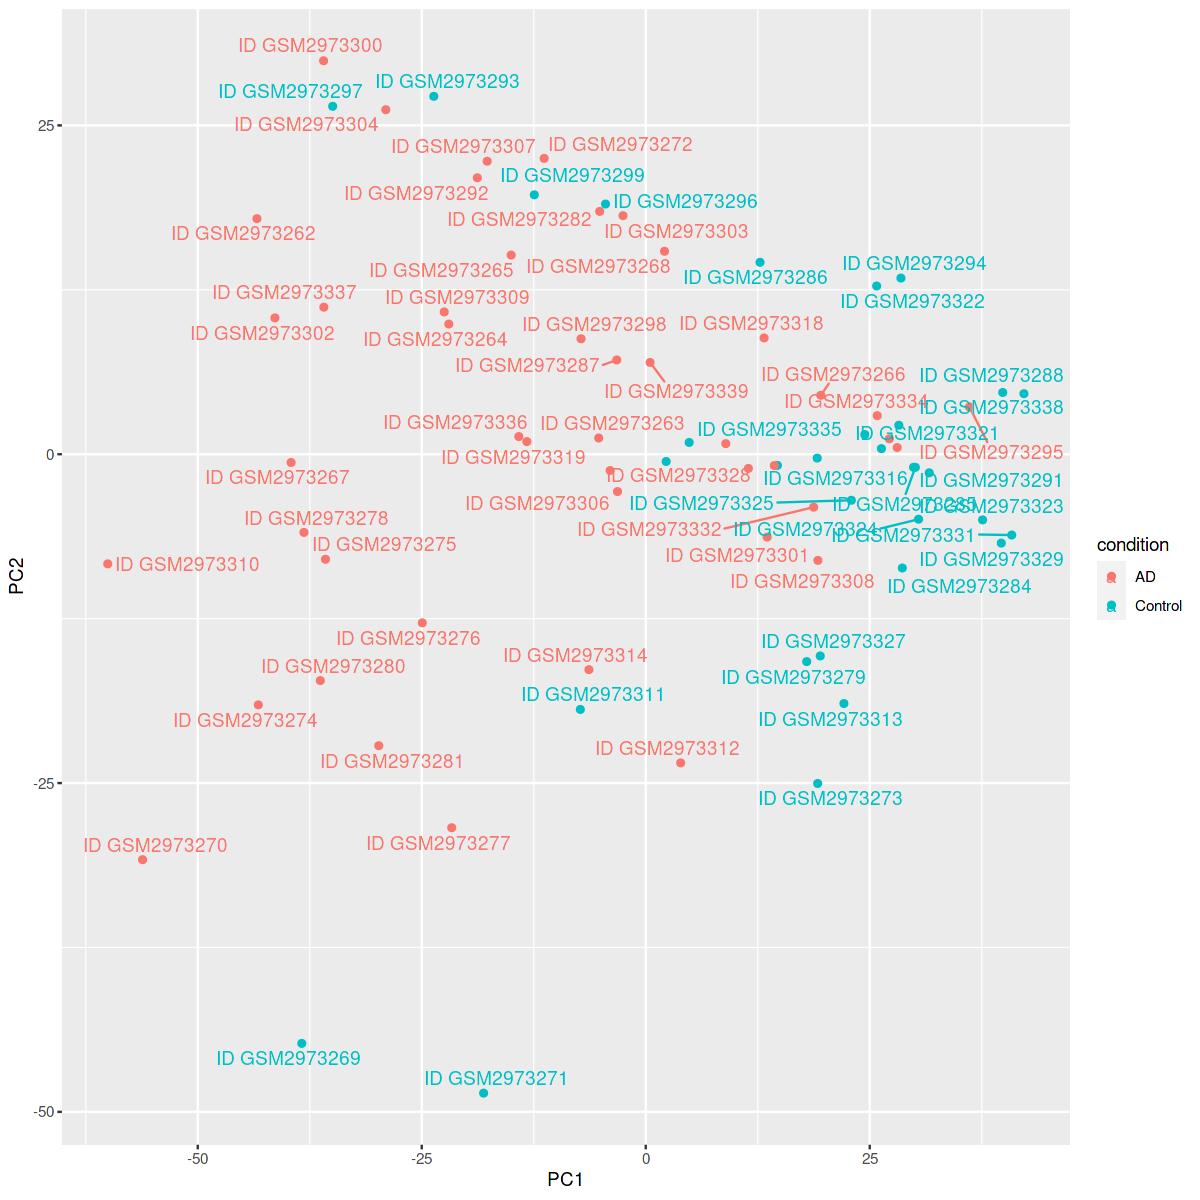

In [13]:
pca <- prcomp(t(data))
# sampleInfo <- cbind(sampleInfo, select(sampleMeta, `age:ch1`))
# sampleInfo <- rename(sampleInfo, age=`age:ch1`)
## Join the PCs to the sample information
options(repr.plot.width=10, repr.plot.height=10)
cbind(sampleInfo, pca$x) %>% ggplot(aes(x=PC1, y=PC2, col=condition, label=paste("ID", rname))) + geom_point() + geom_text_repel()

In [14]:
design <- model.matrix(~0+sampleInfo$condition)
colnames(design) <- c("AD","Control")

### Filter out low-expressed genes:

In [15]:
fit <- lmFit(data, design)
head(fit$coefficients)

AD        Control  
7A5    6.480181  6.479071
A1BG   6.616765  6.632711
A1CF   6.511153  6.500713
A26C3  6.510300  6.487080
A2BP1  7.460676  7.988925
A2M   10.674708 10.304032

In [16]:
contrasts <- makeContrasts(AD - Control, levels=design)

## can define multiple contrasts
## e.g. makeContrasts(Group1 - Group2, Group2 - Group3,....levels=design)

fit2 <- contrasts.fit(fit, contrasts)
fit2 <- eBayes(fit2)
topTable(fit2)

logFC      AveExpr  t         P.Value      adj.P.Val    B       
HSPB3    -0.7772032 7.846604 -8.263895 3.040657e-12 9.638884e-08 17.51884
DNAJC5G  -0.2464776 6.773369 -7.985662 1.048350e-11 1.661634e-07 16.33612
FRMPD2   -0.2085080 6.711966 -7.749829 2.986447e-11 3.028661e-07 15.33546
CENTD2    0.1922625 6.921360  7.683588 4.005304e-11 3.028661e-07 15.05485
VGF      -1.5957832 9.851801 -7.643796 4.777069e-11 3.028661e-07 14.88639
ATXN10   -0.3036232 7.426963 -7.582110 6.276301e-11 3.315979e-07 14.62543
TMEM150A  0.5234834 8.212816  7.517665 8.345079e-11 3.779129e-07 14.35305
NT5DC3   -0.5679697 8.291023 -7.464083 1.057309e-10 4.189587e-07 14.12680
SERTAD3   0.1718439 6.797388  7.407805 1.355309e-10 4.773700e-07 13.88940
STK38     0.4259778 8.256332  7.368258 1.613429e-10 5.114571e-07 13.72272

In [17]:
table(decideTests(fit2))


   -1     0     1 
 4510 22754  4436 

In [18]:
fit2$genes <- anno
topTable(fit2)
full_results <- topTable(fit2, number=Inf)
full_results <- tibble::rownames_to_column(full_results, "id")

ID       logFC      AveExpr  t         P.Value      adj.P.Val   
HSPB3    HSPB3    -0.7772032 7.846604 -8.263895 3.040657e-12 9.638884e-08
DNAJC5G  DNAJC5G  -0.2464776 6.773369 -7.985662 1.048350e-11 1.661634e-07
FRMPD2   FRMPD2   -0.2085080 6.711966 -7.749829 2.986447e-11 3.028661e-07
CENTD2   CENTD2    0.1922625 6.921360  7.683588 4.005304e-11 3.028661e-07
VGF      VGF      -1.5957832 9.851801 -7.643796 4.777069e-11 3.028661e-07
ATXN10   ATXN10   -0.3036232 7.426963 -7.582110 6.276301e-11 3.315979e-07
TMEM150A TMEM150A  0.5234834 8.212816  7.517665 8.345079e-11 3.779129e-07
NT5DC3   NT5DC3   -0.5679697 8.291023 -7.464083 1.057309e-10 4.189587e-07
SERTAD3  SERTAD3   0.1718439 6.797388  7.407805 1.355309e-10 4.773700e-07
STK38    STK38     0.4259778 8.256332  7.368258 1.613429e-10 5.114571e-07
         B       
HSPB3    17.51884
DNAJC5G  16.33612
FRMPD2   15.33546
CENTD2   15.05485
VGF      14.88639
ATXN10   14.62543
TMEM150A 14.35305
NT5DC3   14.12680
SERTAD3  13.88940
STK38    13.72272

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


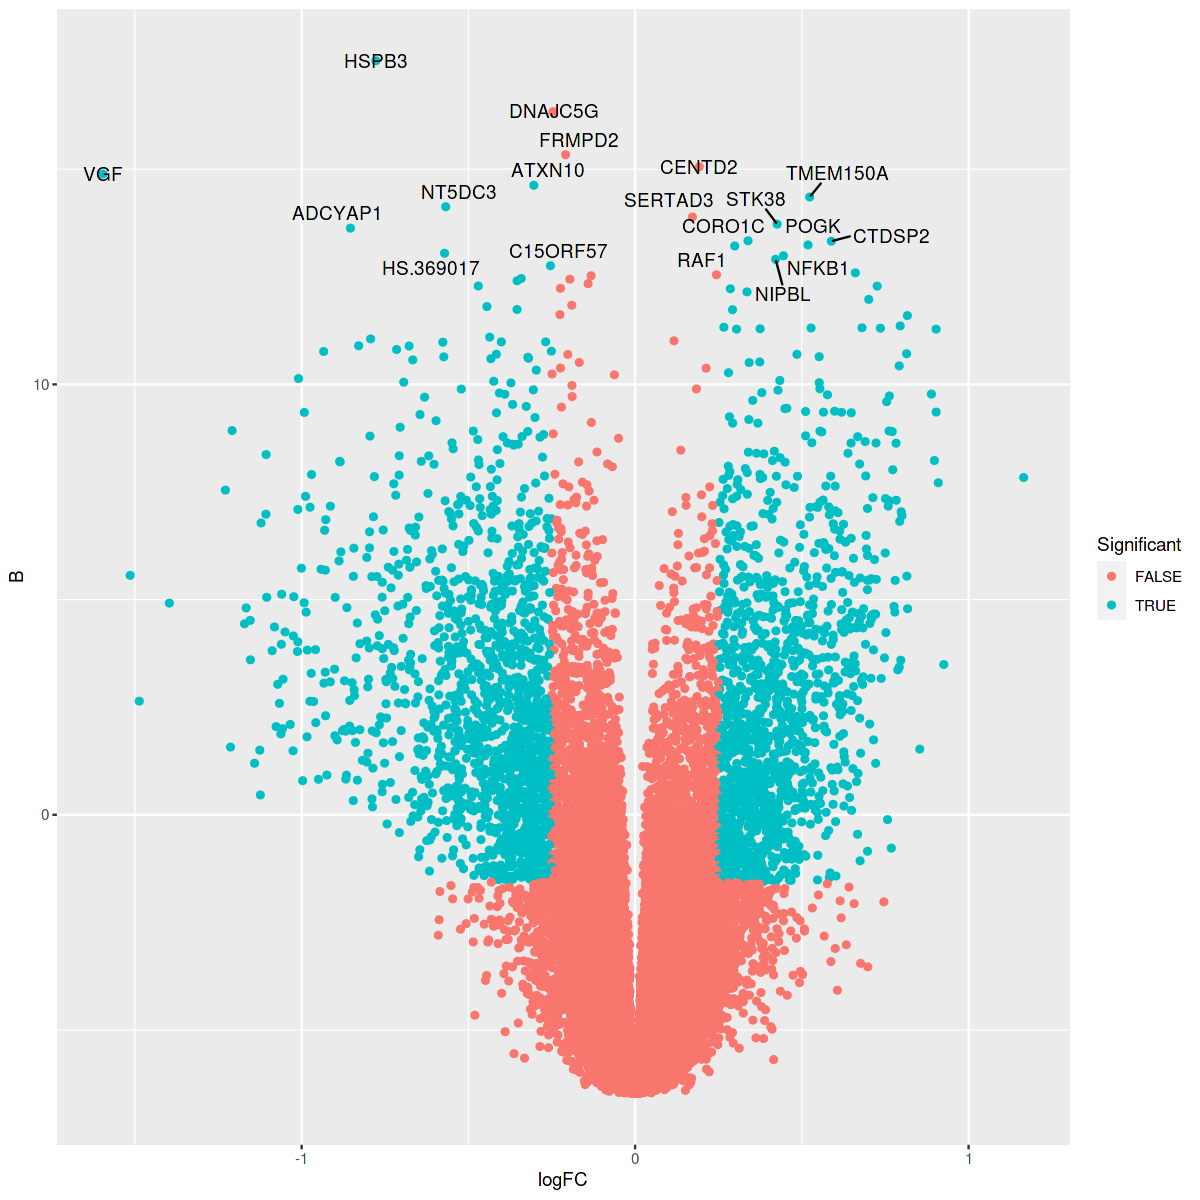

In [19]:
p_cutoff <- 0.01
fc_cutoff <- 0.25
topN <- 20

full_results %>% 
  mutate(Significant = adj.P.Val < p_cutoff & abs(logFC) > fc_cutoff ) %>% 
  mutate(Rank = 1:n(), Label = ifelse(Rank < topN, ID,"")) %>% 
  ggplot(aes(x = logFC, y = B, col=Significant, label=Label)) + geom_point() + geom_text_repel(col="black")

In [20]:
# filter according to p-value (adjusted) and fold-change cut-offs
p_cutoff <- 0.01
fc_cutoff <- 1.25

head(filter(full_results, adj.P.Val < 0.05, abs(logFC) > 1))

# These results can be exported with the write_csv function.
library(readr)
filter(full_results, adj.P.Val < 0.05, abs(logFC) > 1) %>%
  write_csv("filtered_de_results.csv")

id     ID     logFC     AveExpr  t         P.Value      adj.P.Val   
1 VGF    VGF    -1.595783 9.851801 -7.643796 4.777069e-11 3.028661e-07
2 NAP1L5 NAP1L5 -1.009318 9.268861 -6.507246 6.881493e-09 2.796709e-06
3 PCSK1  PCSK1  -1.208502 8.032850 -6.210770 2.443018e-08 6.243107e-06
4 STAT4  STAT4  -1.106473 8.078502 -6.073074 4.375087e-08 8.777864e-06
5 SLC5A3 SLC5A3  1.165255 8.786209  5.939979 7.654548e-08 1.239260e-05
6 NPTX2  NPTX2  -1.228642 9.417981 -5.866552 1.040393e-07 1.505957e-05
  B        
1 14.886387
2 10.135623
3  8.925993
4  8.370081
5  7.836709
6  7.544229

In [21]:
## Use to top 20 genes for illustration

topN <- 10
##
gene_names <- mutate(full_results, Rank = 1:n() + 1) %>% 
  filter(Rank < topN) %>% 
  pull(ID) 

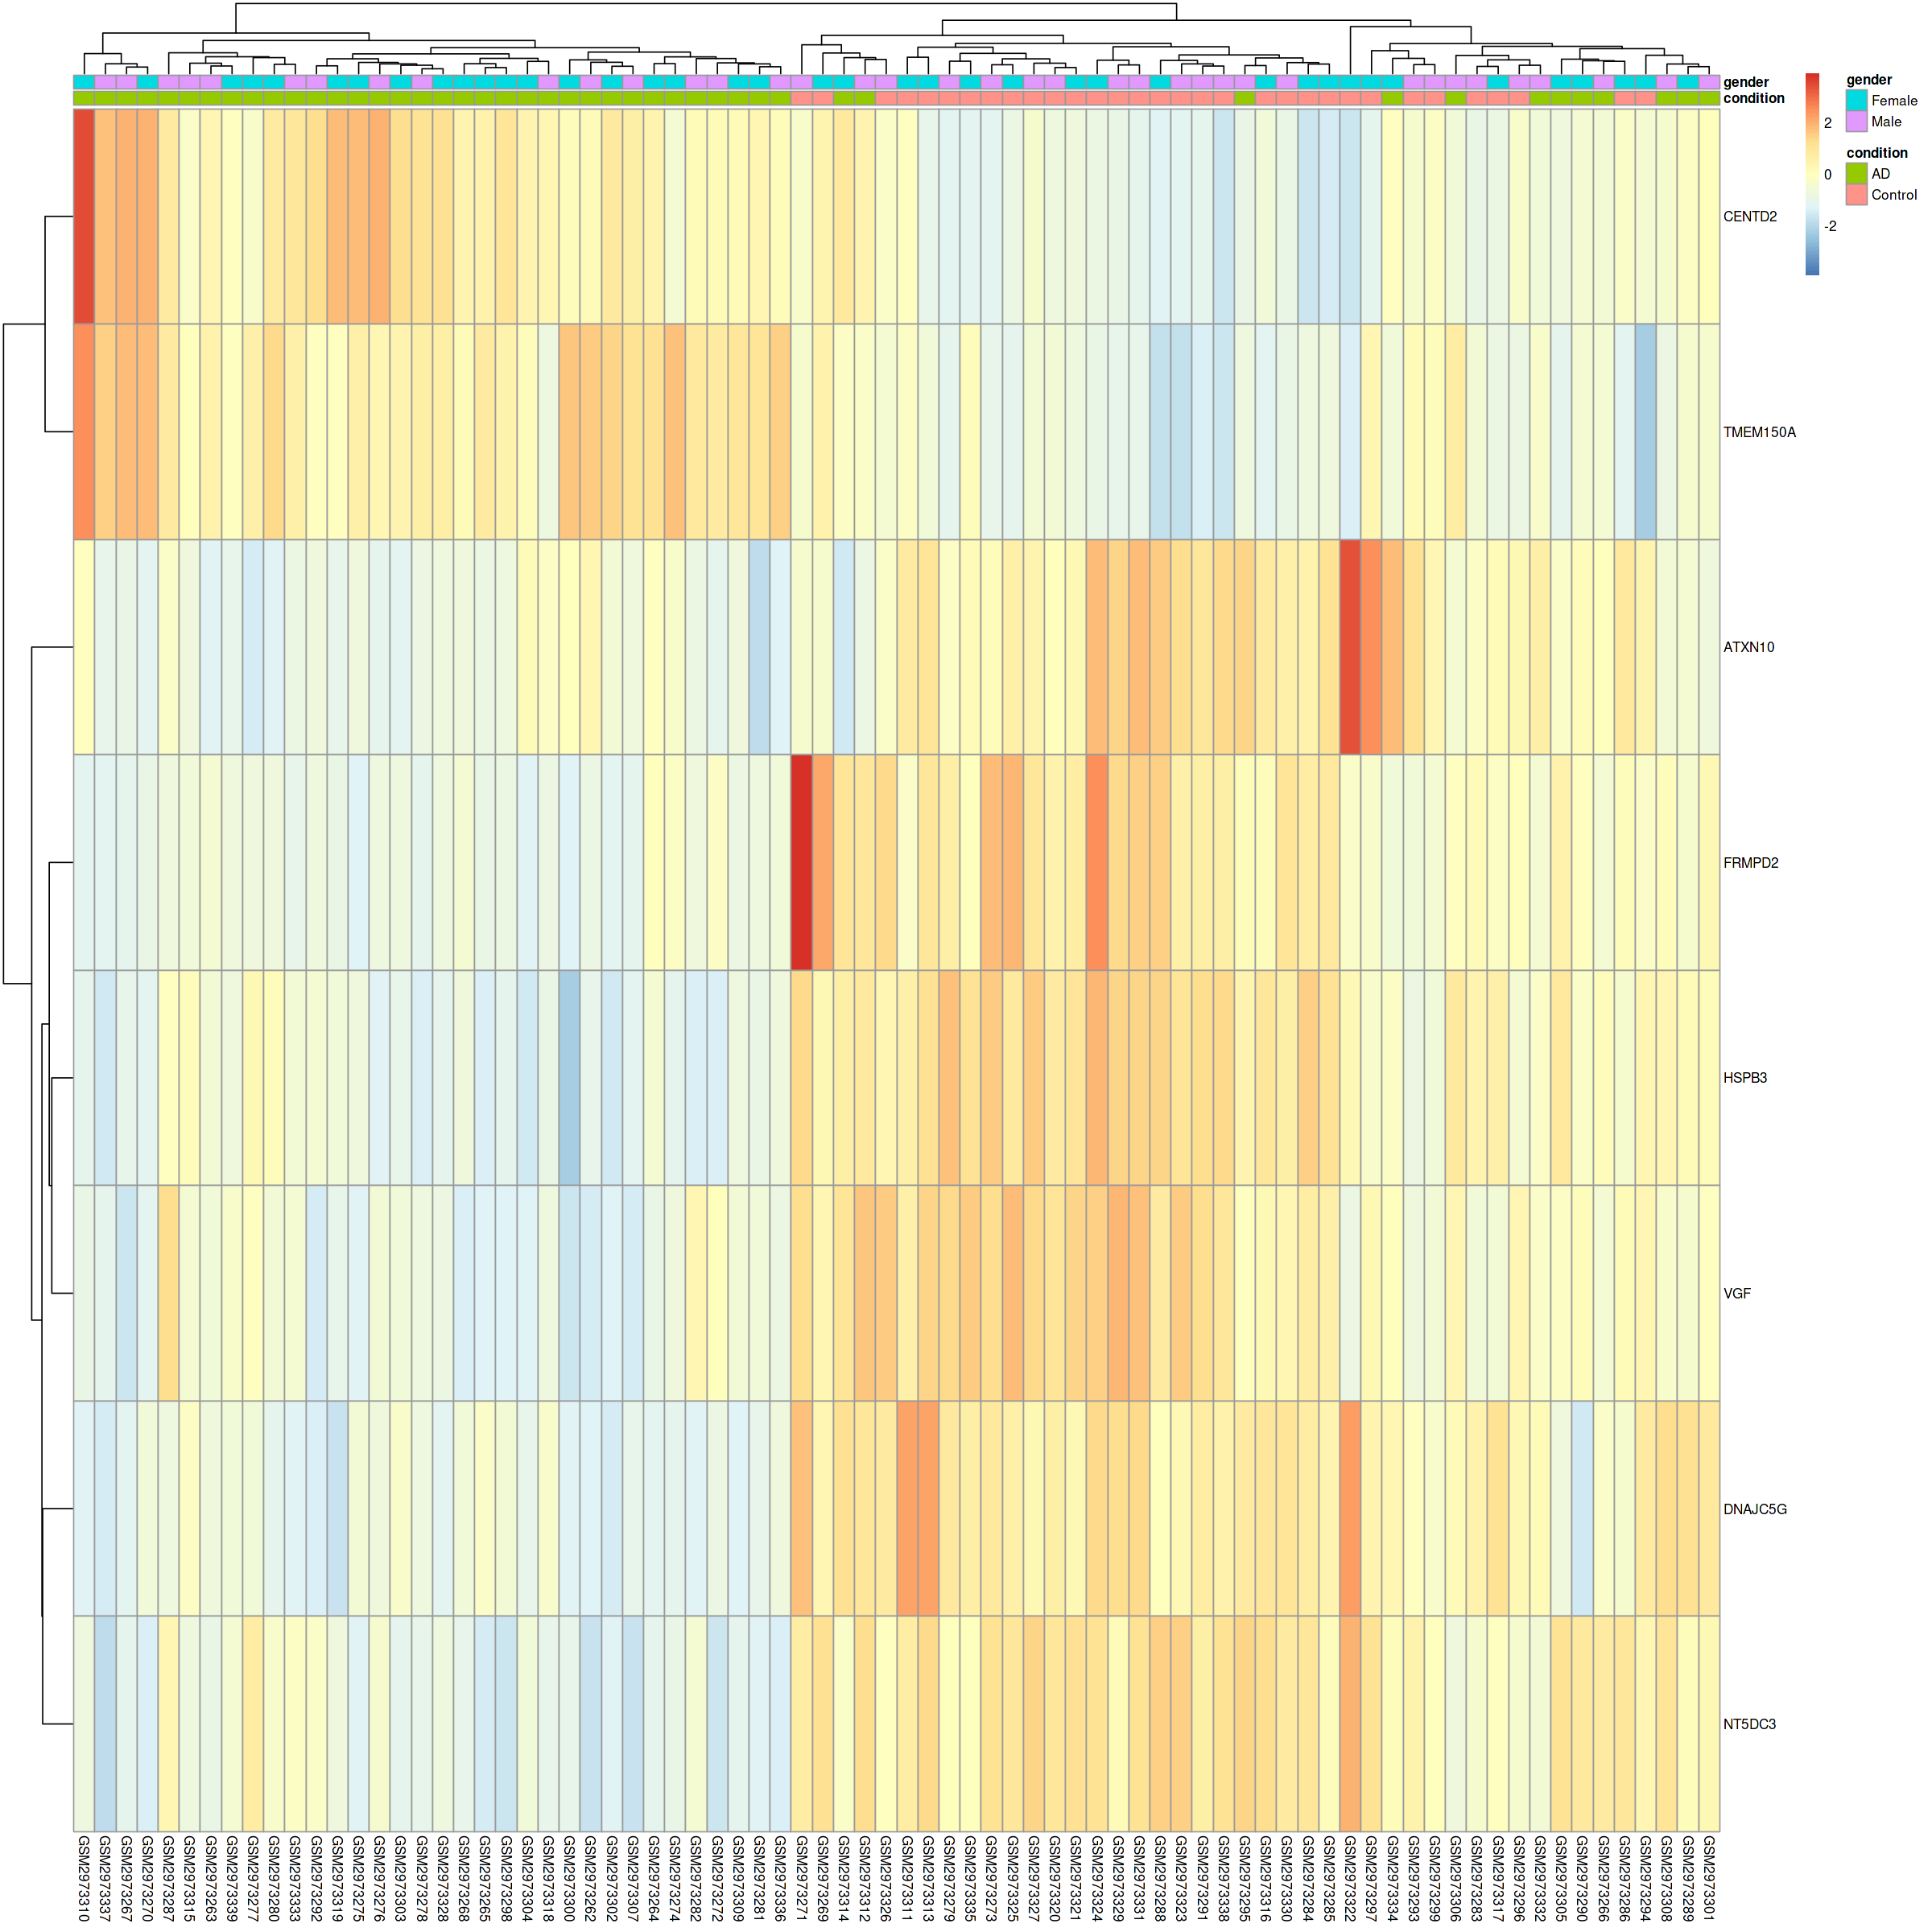

In [22]:
## Get the rows corresponding to ids_of_interest and all columns
gene_matrix <- data[gene_names,]
options(repr.plot.width=20, repr.plot.height=20)
pheatmap(
    gene_matrix,
    labels_row=gene_names,
    annotation_col=select(sampleInfo, condition, gender),
    scale="row")

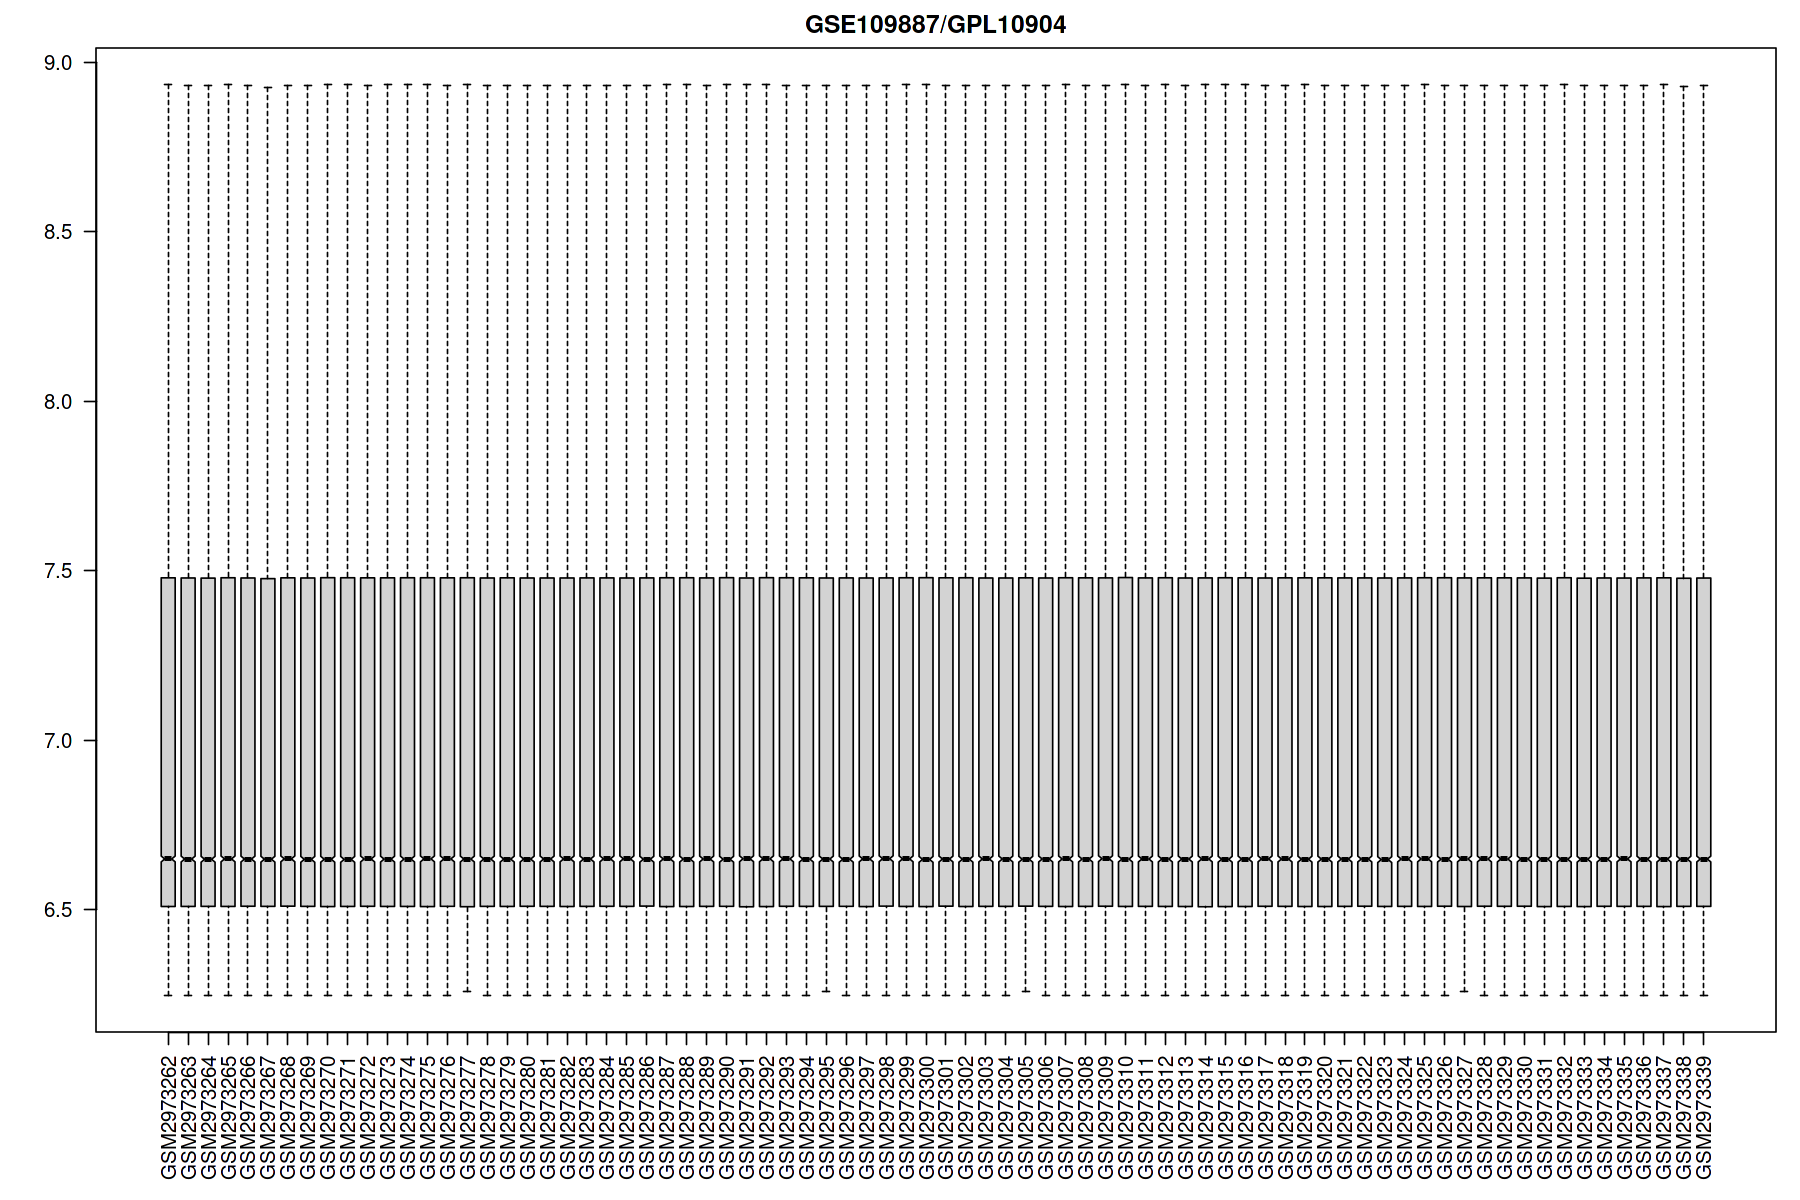

In [23]:
# box-and-whisker plot
options(repr.plot.width=15, repr.plot.height=10)
par(mar=c(7,4,2,1))
title <- paste ("GSE109887", "/", annotation(gset), sep ="")
boxplot(data, boxwex=0.7, notch=T, main=title, outline=FALSE, las=2)

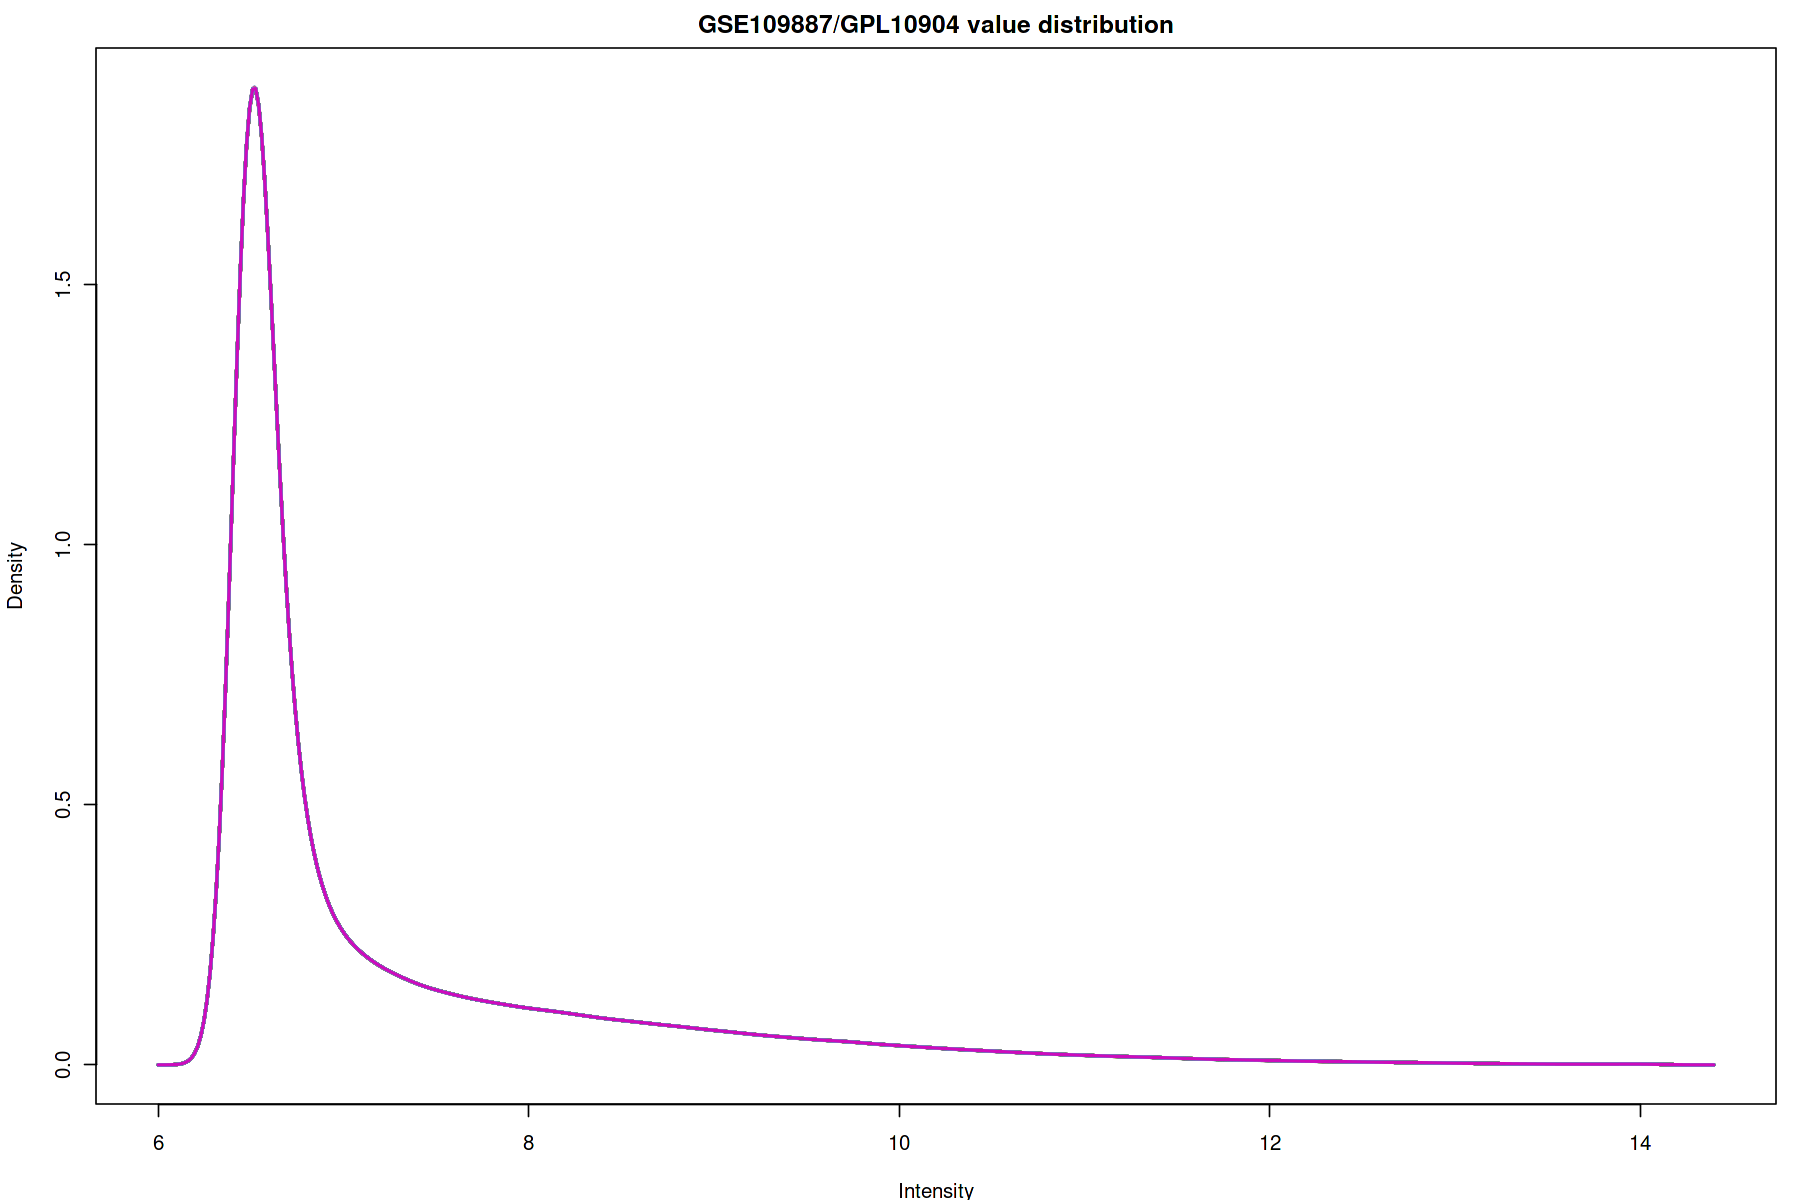

In [25]:
# expression value distribution plot
par(mar=c(4,4,2,1))
title <- paste ("GSE109887", "/", annotation(gset), " value distribution", sep ="")
plotDensities(data, main=title, legend=F)

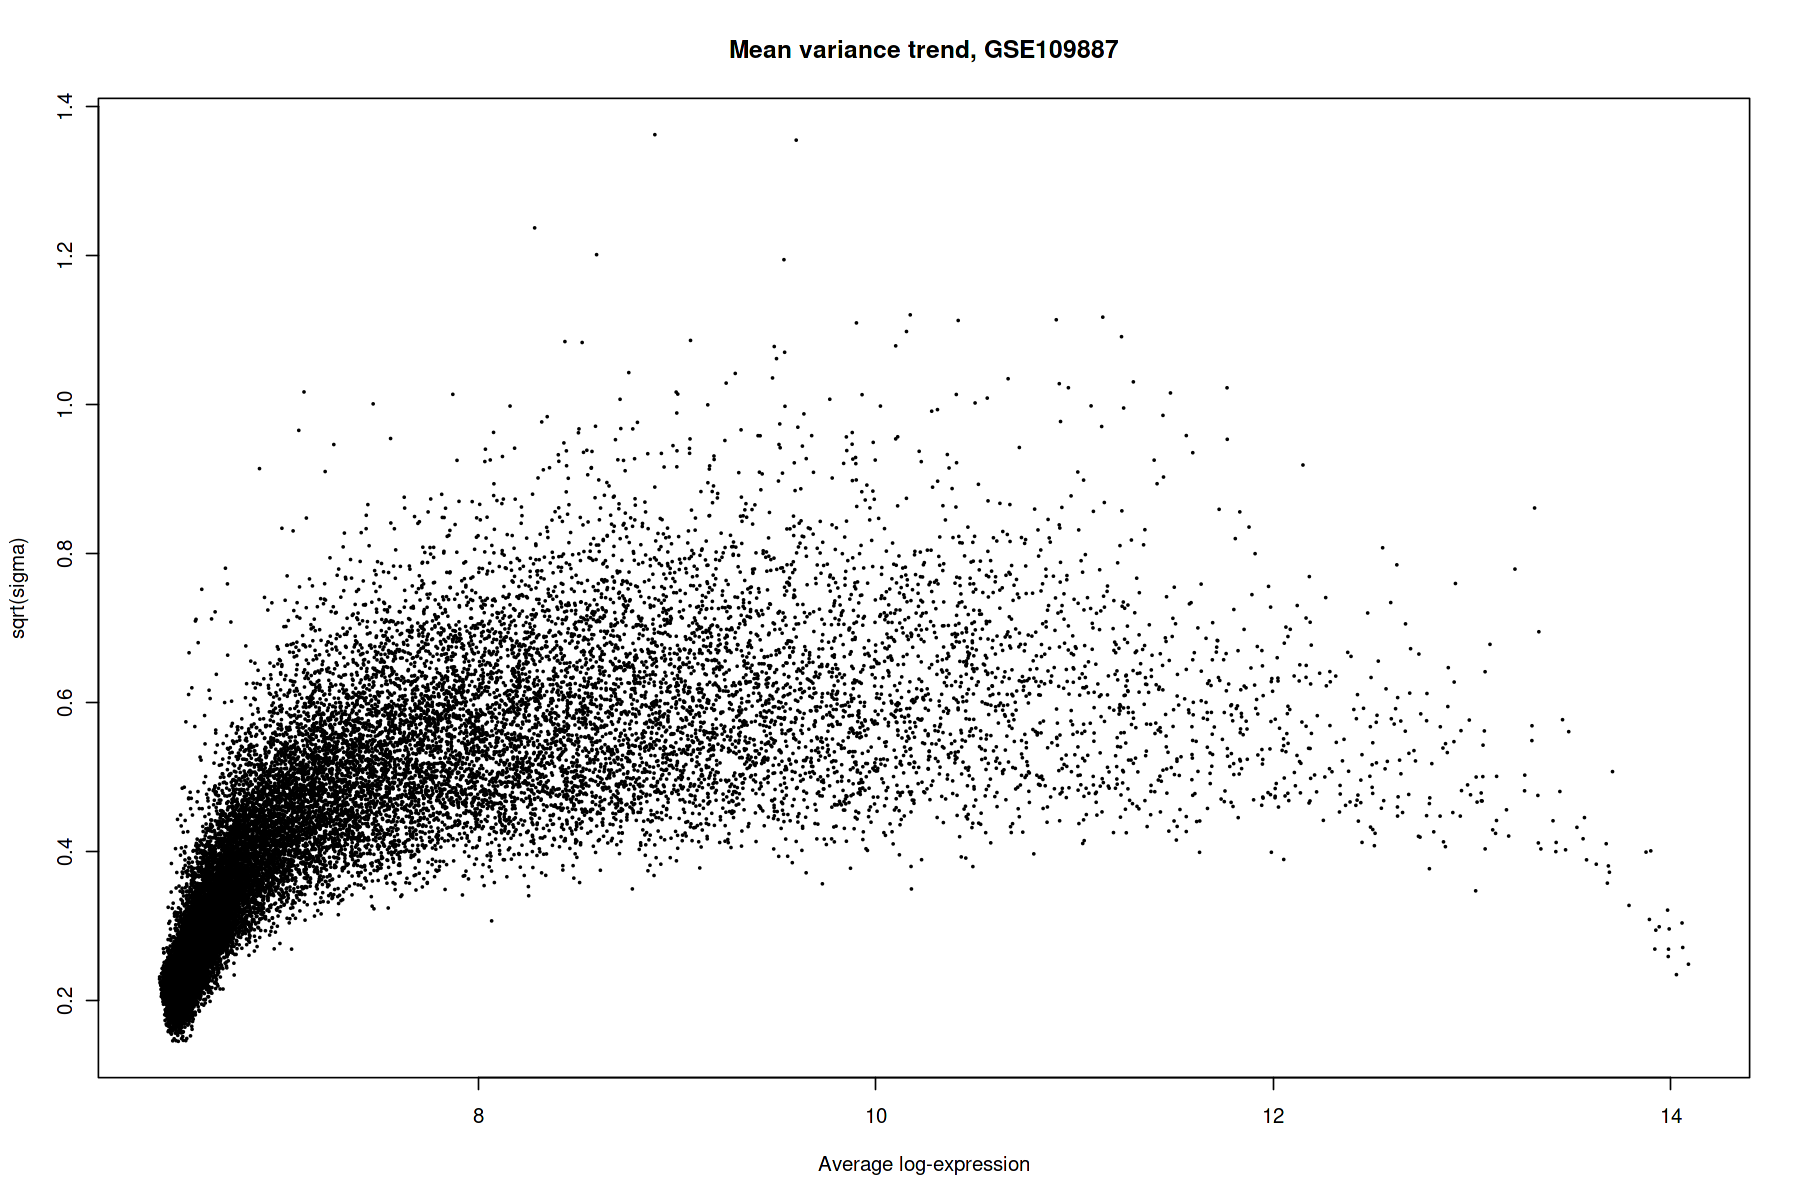

In [28]:
# mean-variance trend
design <- model.matrix(~0+sampleInfo$condition)
colnames(design) <- c("AD","Control")
# ex <- na.omit(data) # eliminate rows with NAs

plotSA(lmFit(data, design), main="Mean variance trend, GSE109887")

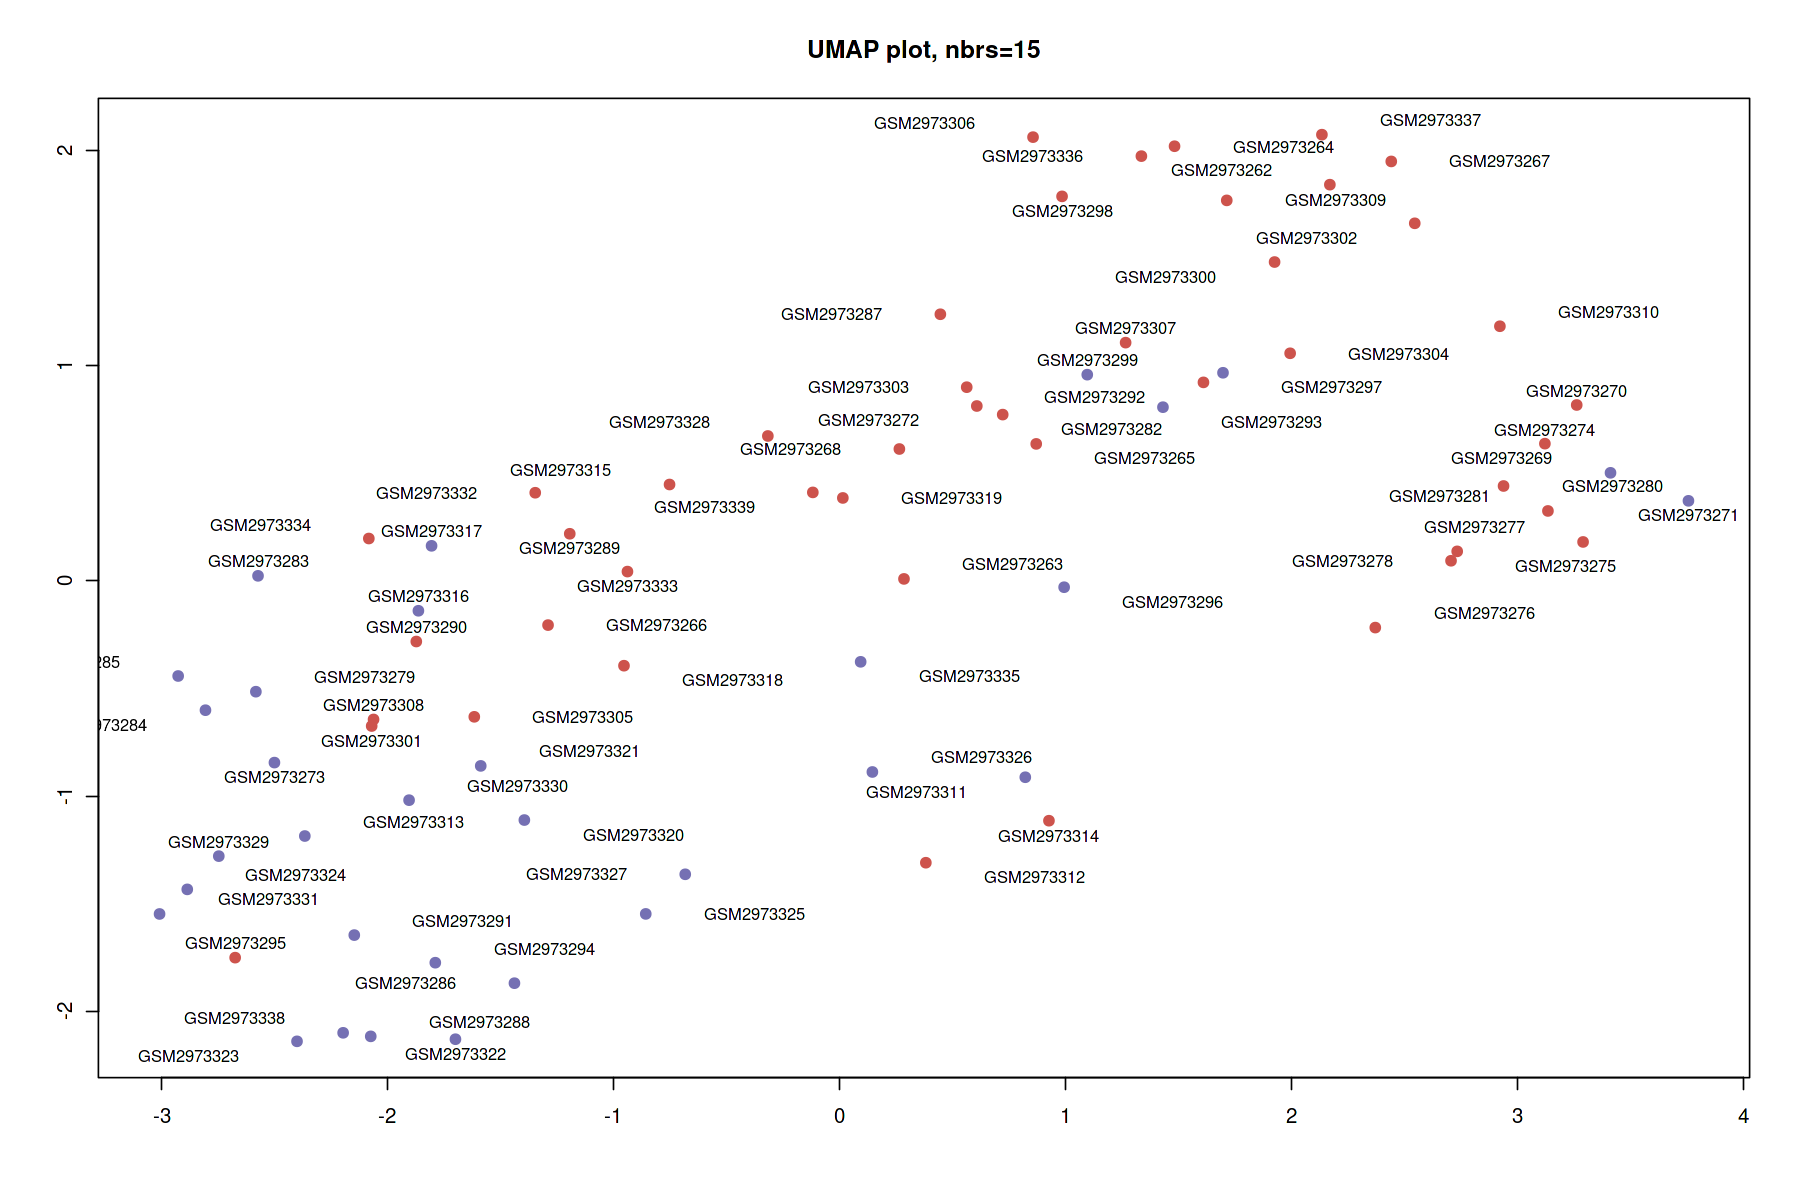

In [36]:
# UMAP plot (multi-dimensional scaling)
ex <- data[!duplicated(data), ]  # remove duplicates
ump <- umap(t(ex), n_neighbors = 15, random_state = 123)

colours <- data.frame(c("#CD534CFF", "#7570B3"))
row.names(colours) <- c('AD', 'Control')
mapped <- sampleInfo[row.names(ump$layout),]$condition
colours <- colours[mapped,]

plot(ump$layout, 
     col=colours,
     main="UMAP plot, nbrs=15", 
     xlab="", ylab="", pch=20, cex=1.5)
library("maptools")  # point labels without overlaps
pointLabel(
    ump$layout,labels = rownames(ump$layout), method="SANN", cex=.8)

# GO enrichment

In [62]:
library(clusterProfiler)

In [64]:
gene_names <- full_results %>% dplyr::filter(P.Value < .01 & abs(logFC) > .25) %>% pull(ID)
length(gene_names)

[1] 3117

ID         Description               GeneRatio BgRatio  
GO:0098978 GO:0098978 glutamatergic synapse     104/2253  338/19549
GO:0031252 GO:0031252 cell leading edge         116/2253  422/19549
GO:0097060 GO:0097060 synaptic membrane         101/2253  384/19549
GO:0070382 GO:0070382 exocytic vesicle          70/2253   224/19549
GO:0008021 GO:0008021 synaptic vesicle          65/2253   206/19549
GO:0030672 GO:0030672 synaptic vesicle membrane 44/2253   109/19549
           pvalue       p.adjust     qvalue       Count
GO:0098978 8.367438e-22 5.899044e-19 4.113256e-19 104  
GO:0031252 9.162647e-20 3.229833e-17 2.252082e-17 116  
GO:0097060 5.837724e-16 1.371865e-13 9.565673e-14 101  
GO:0070382 1.712668e-15 3.018577e-13 2.104779e-13  70  
GO:0008021 1.037321e-14 1.149117e-12 8.012507e-13  65  
GO:0030672 1.140967e-14 1.149117e-12 8.012507e-13  44

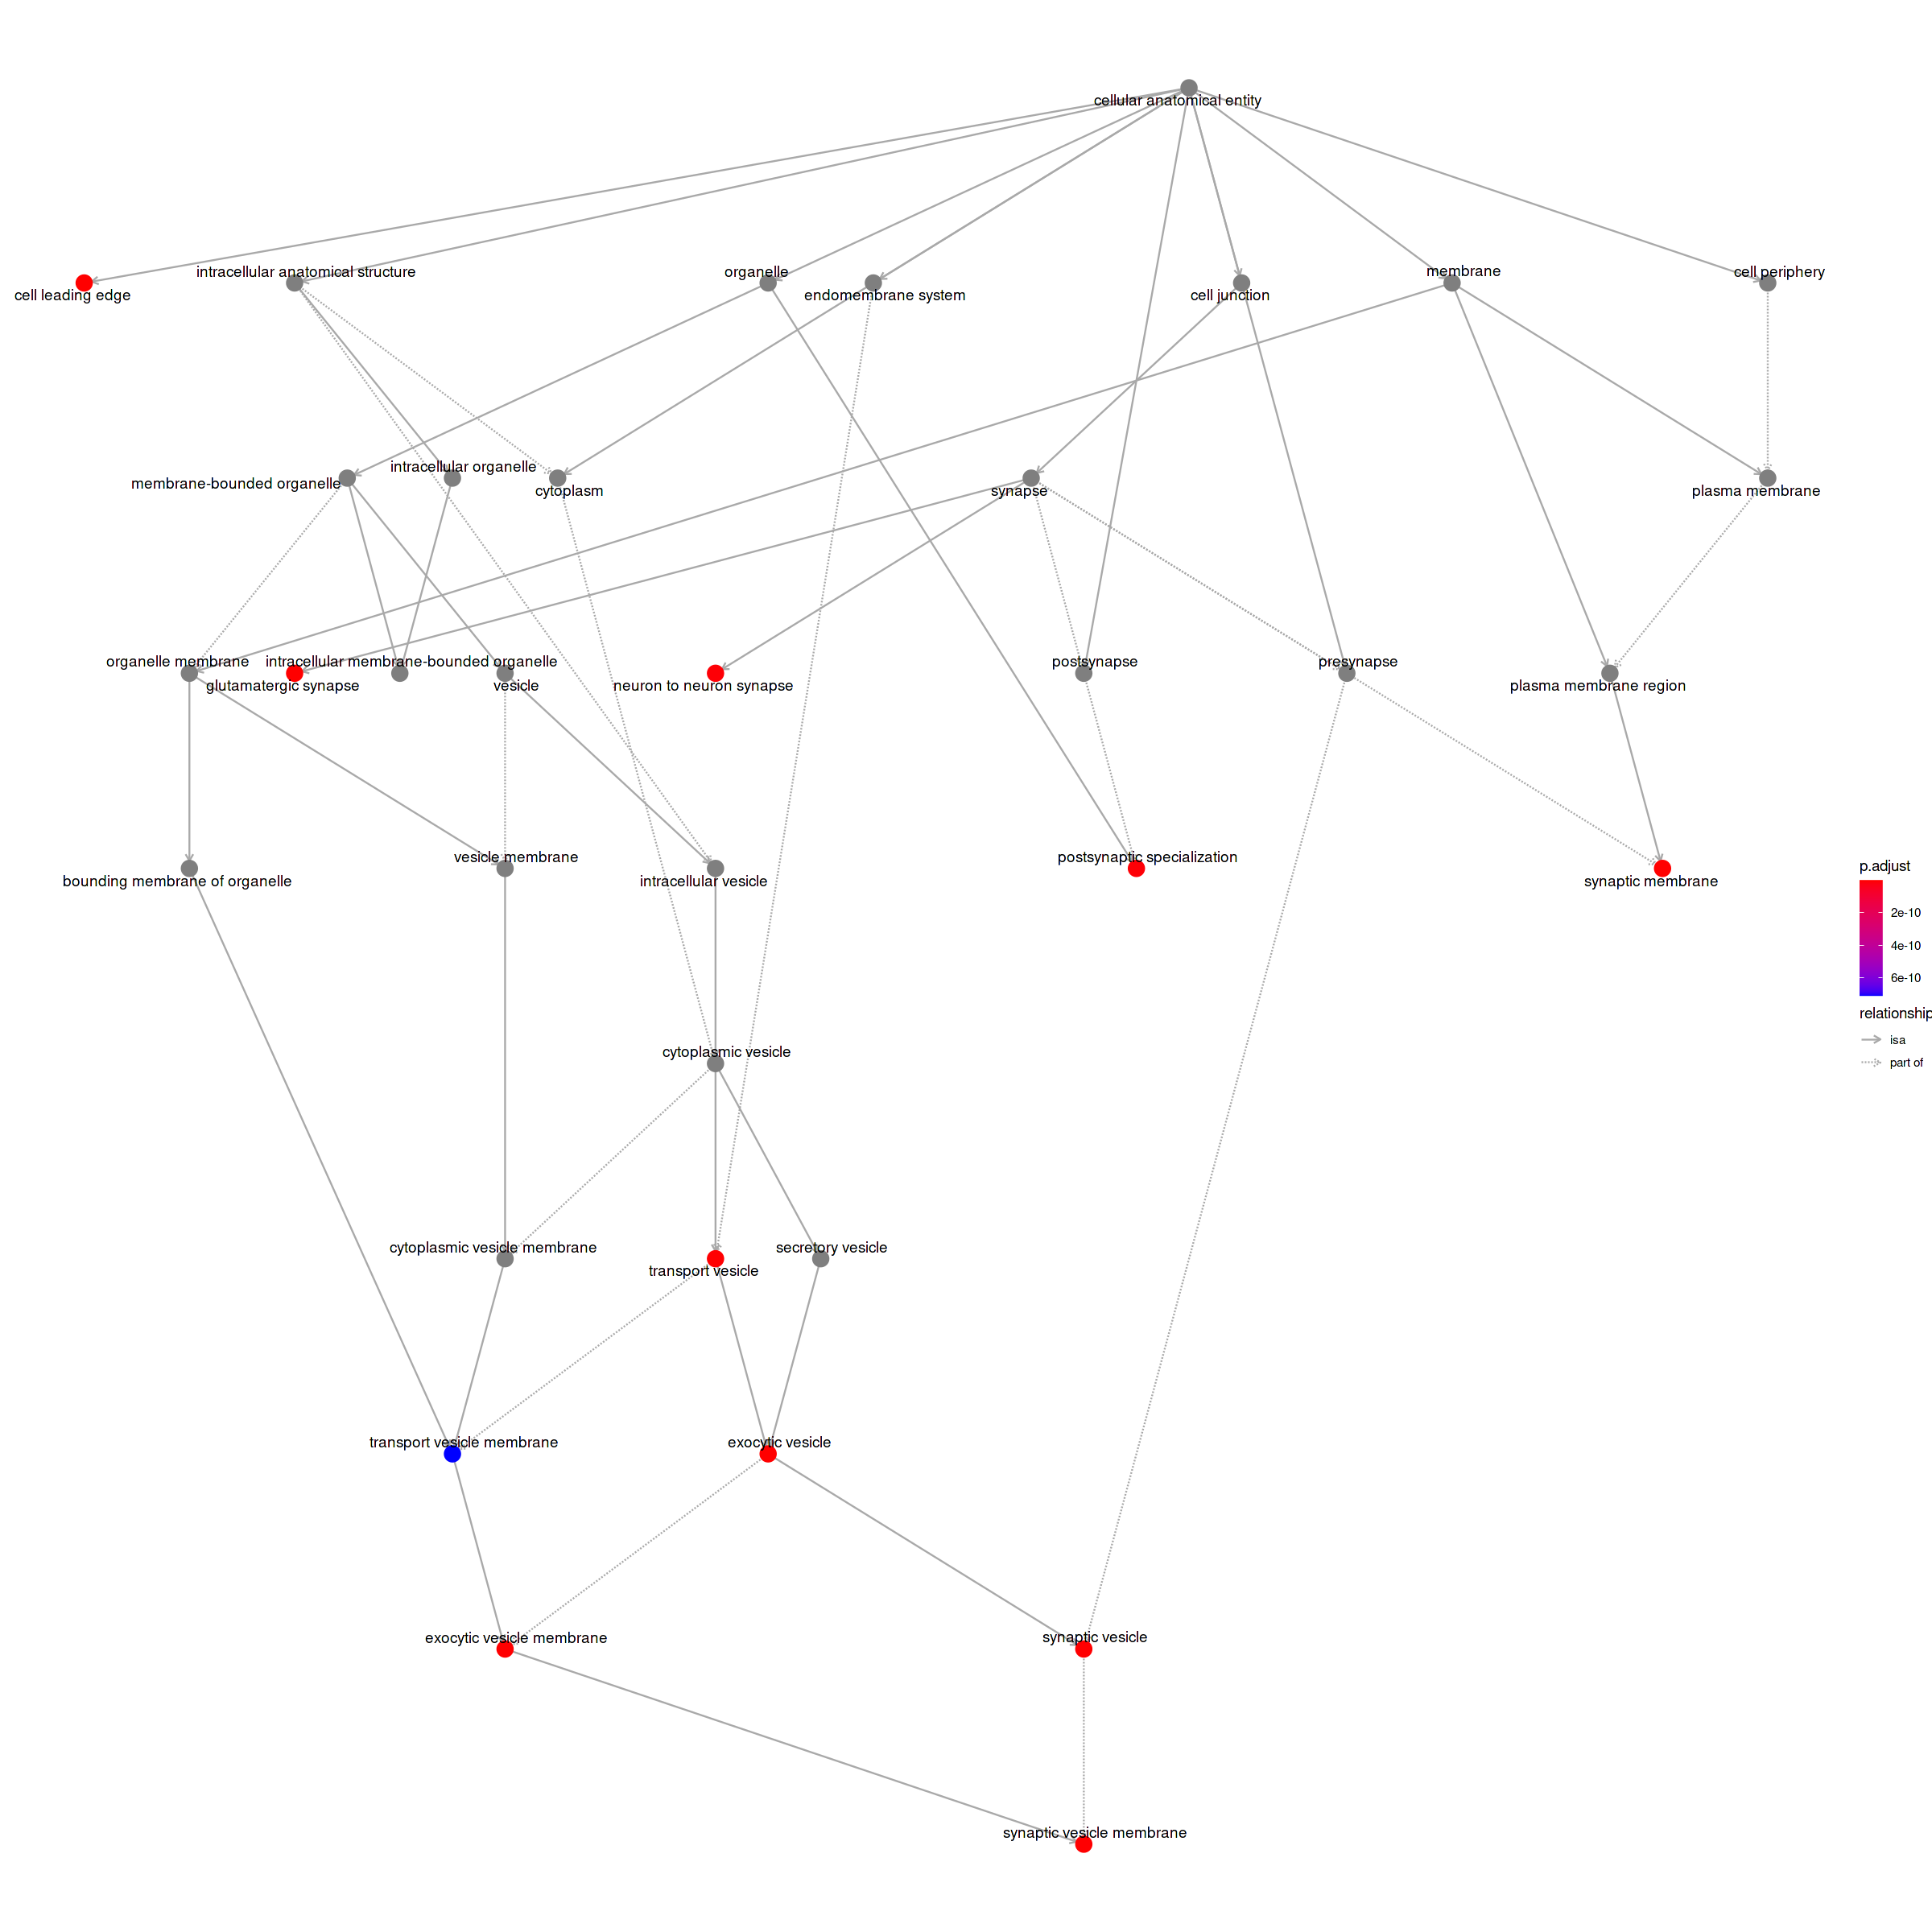

In [68]:
ego <- enrichGO(gene          = gene_names,
                OrgDb         = 'org.Hs.eg.db',
                keyType       = 'SYMBOL',
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

head(within(ego@result, rm(geneID)))
goplot(ego)

# WGCNA

In [13]:
library(DESeq2)
library(tidyr)
library(WGCNA);
library(sparseMatrixStats)
options(stringsAsFactors = FALSE);

In [14]:
data <- data.frame(data)
head(data) ## print the expression data

GSM2973262 GSM2973263 GSM2973264 GSM2973265 GSM2973266 GSM2973267
7A5    6.436441   6.500922   6.513507   6.480839   6.478978   6.509372 
A1BG   6.736136   6.649034   6.612224   6.559642   6.574546   6.471425 
A1CF   6.545395   6.479783   6.588104   6.482503   6.466453   6.442931 
A26C3  6.529725   6.504956   6.531813   6.549229   6.458589   6.602654 
A2BP1  6.773307   7.675723   7.159857   7.334894   7.928057   7.427863 
A2M   11.253437  10.758069  10.790378  11.280206  10.550165  11.015546 
      GSM2973268 GSM2973269 GSM2973270 GSM2973271 ⋯ GSM2973330 GSM2973331
7A5    6.558079   6.539648   6.476178   6.384209  ⋯ 6.462642    6.536339 
A1BG   6.601043   6.680376   6.619720   6.695035  ⋯ 6.667337    6.551605 
A1CF   6.448482   6.511453   6.537003   6.485914  ⋯ 6.540705    6.491767 
A26C3  6.551262   6.618060   6.473897   6.475091  ⋯ 6.557970    6.505190 
A2BP1  7.753590   7.542770   6.962004   7.844319  ⋯ 8.141308    8.334120 
A2M   10.374510  10.232084  11.219453  10.558733  ⋯ 9.642897   10.061636 
      GSM2973332 GSM2973333 GSM2973334 GSM2973335 GSM2973336 GSM2973337
7A5    6.506450   6.429433   6.427672   6.488852   6.503583   6.508713 
A1BG   6.557762   6.600702   6.648831   6.660864   6.617121   6.541810 
A1CF   6.479403   6.535446   6.487697   6.515856   6.546361   6.457605 
A26C3  6.585256   6.594342   6.523304   6.526753   6.492019   6.623703 
A2BP1  8.201316   7.891050   8.061283   7.794727   7.156839   6.903667 
A2M   11.116617  10.779104  10.415084  10.889901  11.026483  10.926880 
      GSM2973338 GSM2973339
7A5   6.442999    6.465497 
A1BG  6.547078    6.611912 
A1CF  6.469584    6.521874 
A26C3 6.467831    6.453058 
A2BP1 8.187274    7.777883 
A2M   9.636975   10.613131

In [15]:
vsd <- as.matrix(data)
rv_wpn <- matrixStats::rowVars(vsd)
q95_wpn <- quantile(rv_wpn, .85)  # <= changed to 95 quantile to reduce dataset
expr_normalized <- vsd[ rv_wpn > q95_wpn, ]

dim(expr_normalized)

[1] 4755   78

[1] 15850    78

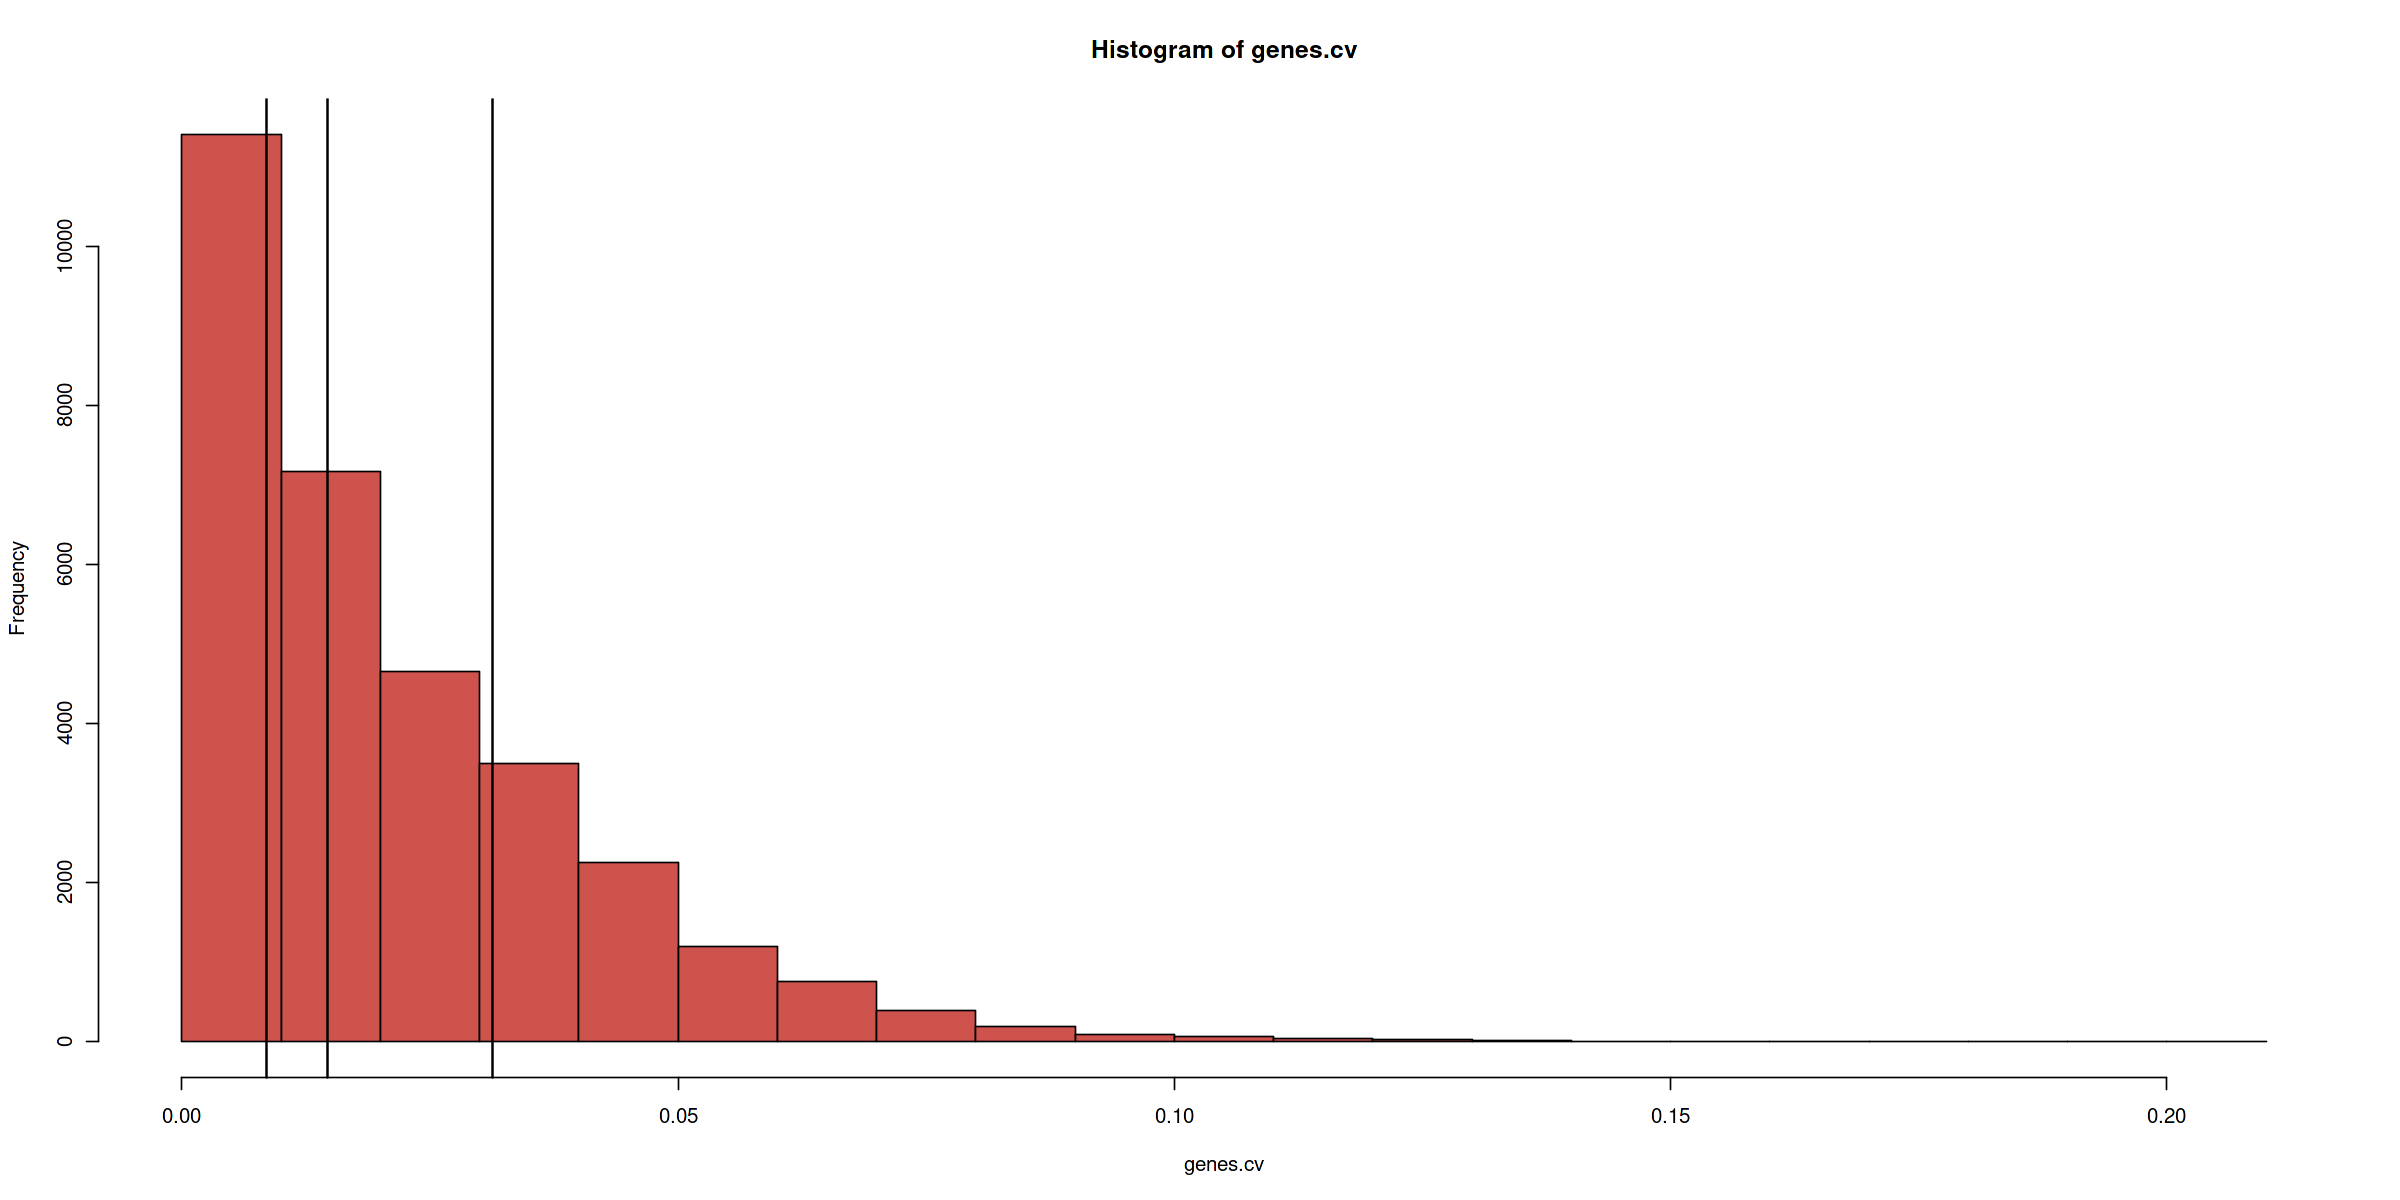

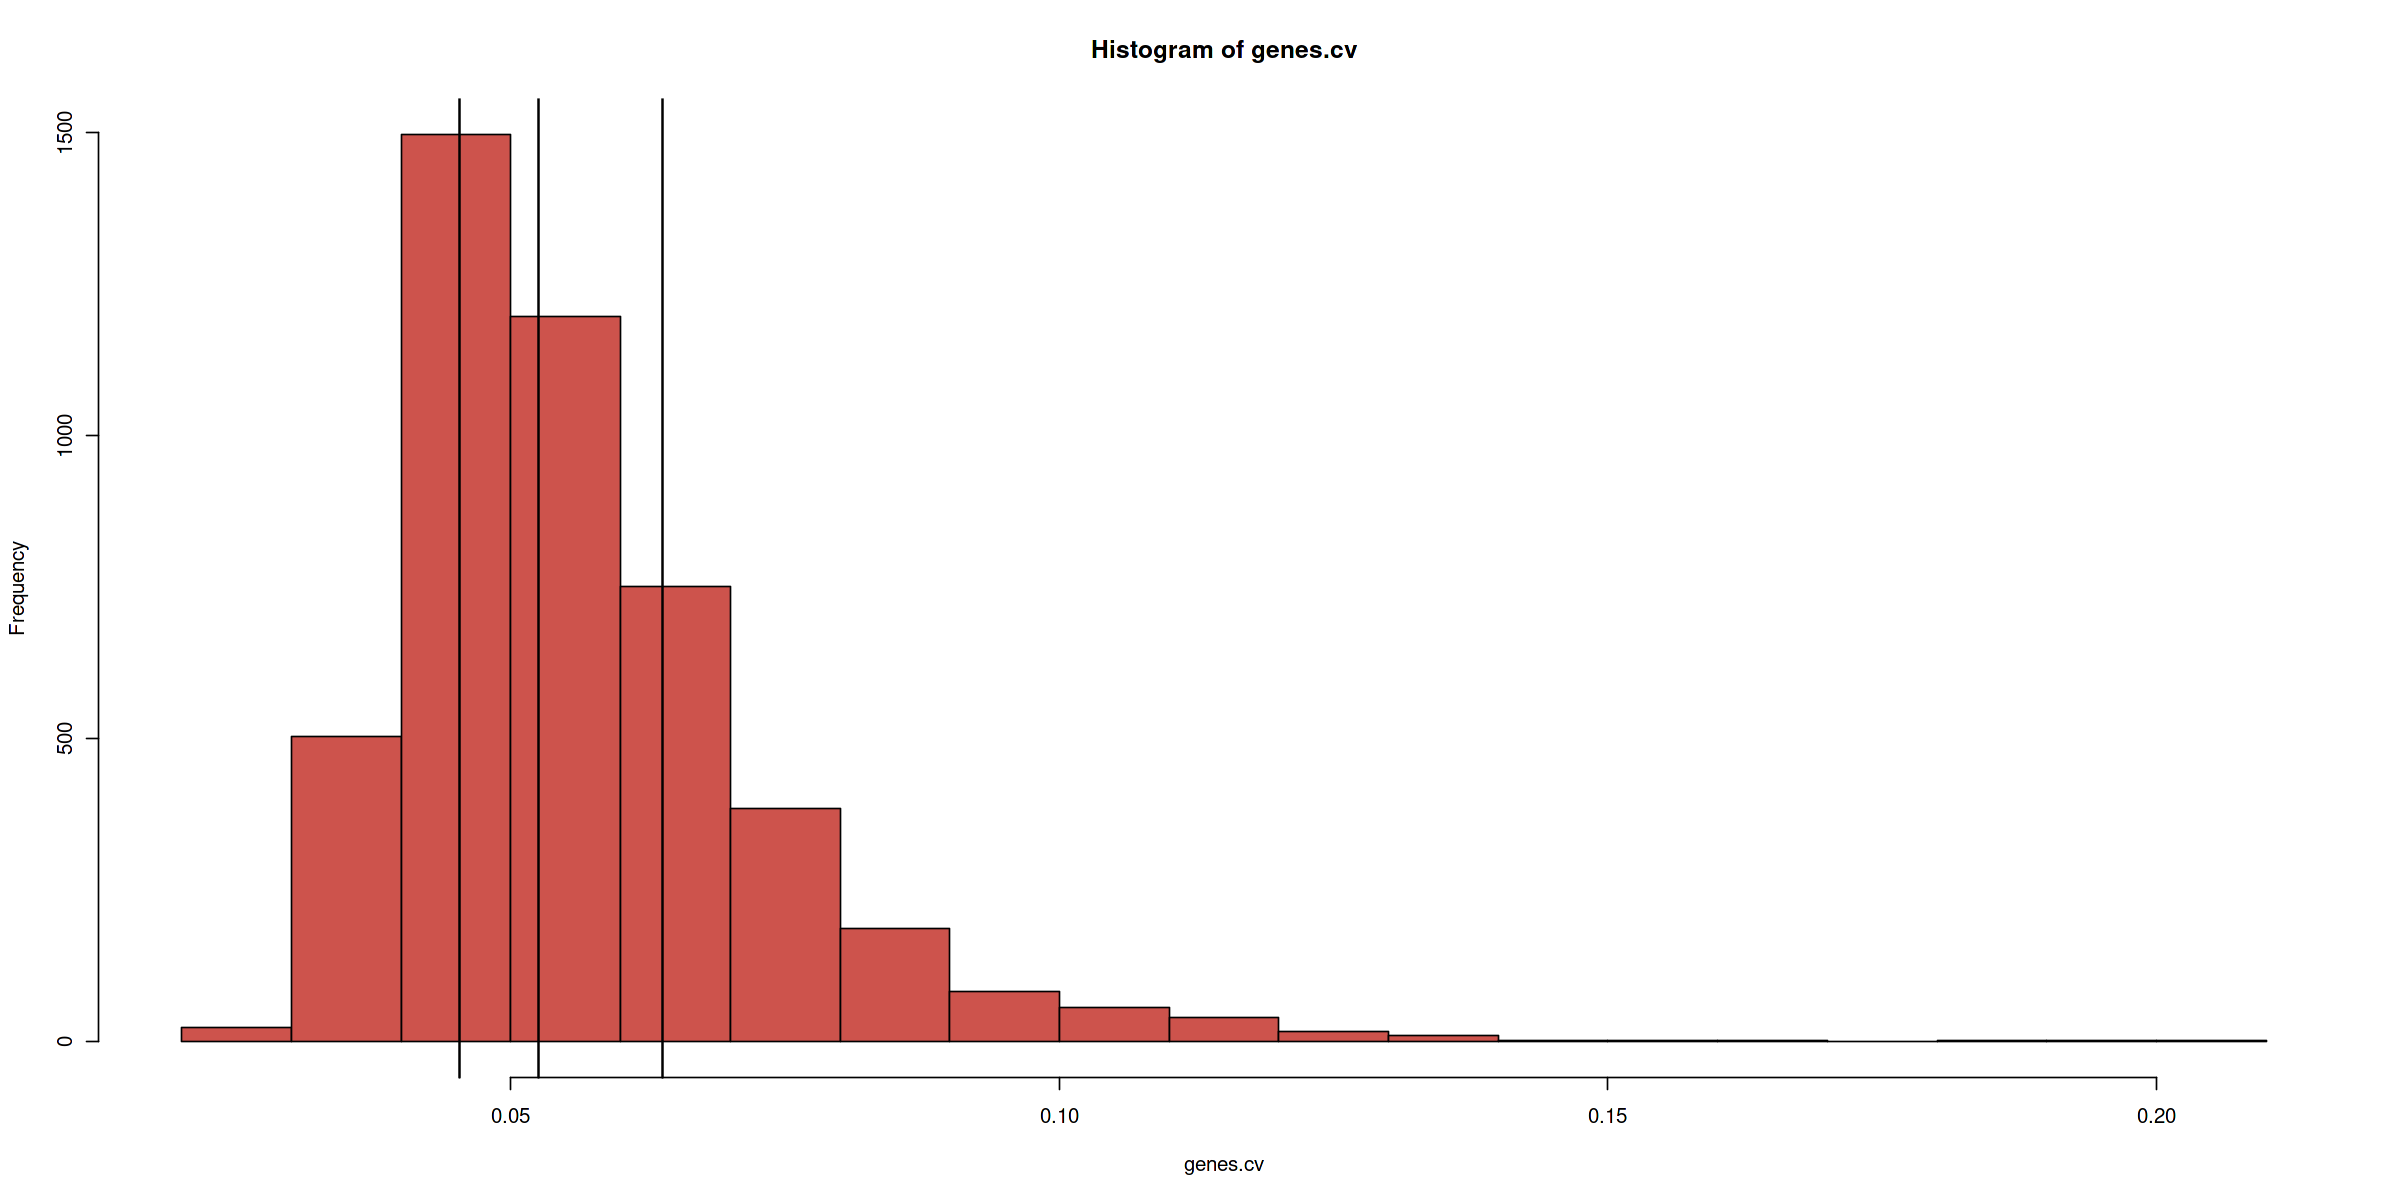

In [16]:
genes.cv <- apply(data, 1, function(x) sd(x) / mean(x)) 
                  
hist(genes.cv, col='#CD534CFF')
abline(v=quantile(genes.cv, probes=0.5)[2:4], lwd=1.5)

roi <- genes.cv > quantile(genes.cv, probs=0.5)
selected <- data[roi, ]
dim(selected)
                  
genes.cv <- apply(expr_normalized, 1, function(x) sd(x) / mean(x)) 
                  
hist(genes.cv, col='#CD534CFF')
abline(v=quantile(genes.cv, probes=0.5)[2:4], lwd=1.5)

In [17]:
# let's use old 95's percentel of variance normalisation
# expr_normalized <- selected
selected <- expr_normalized
data <- t(selected)

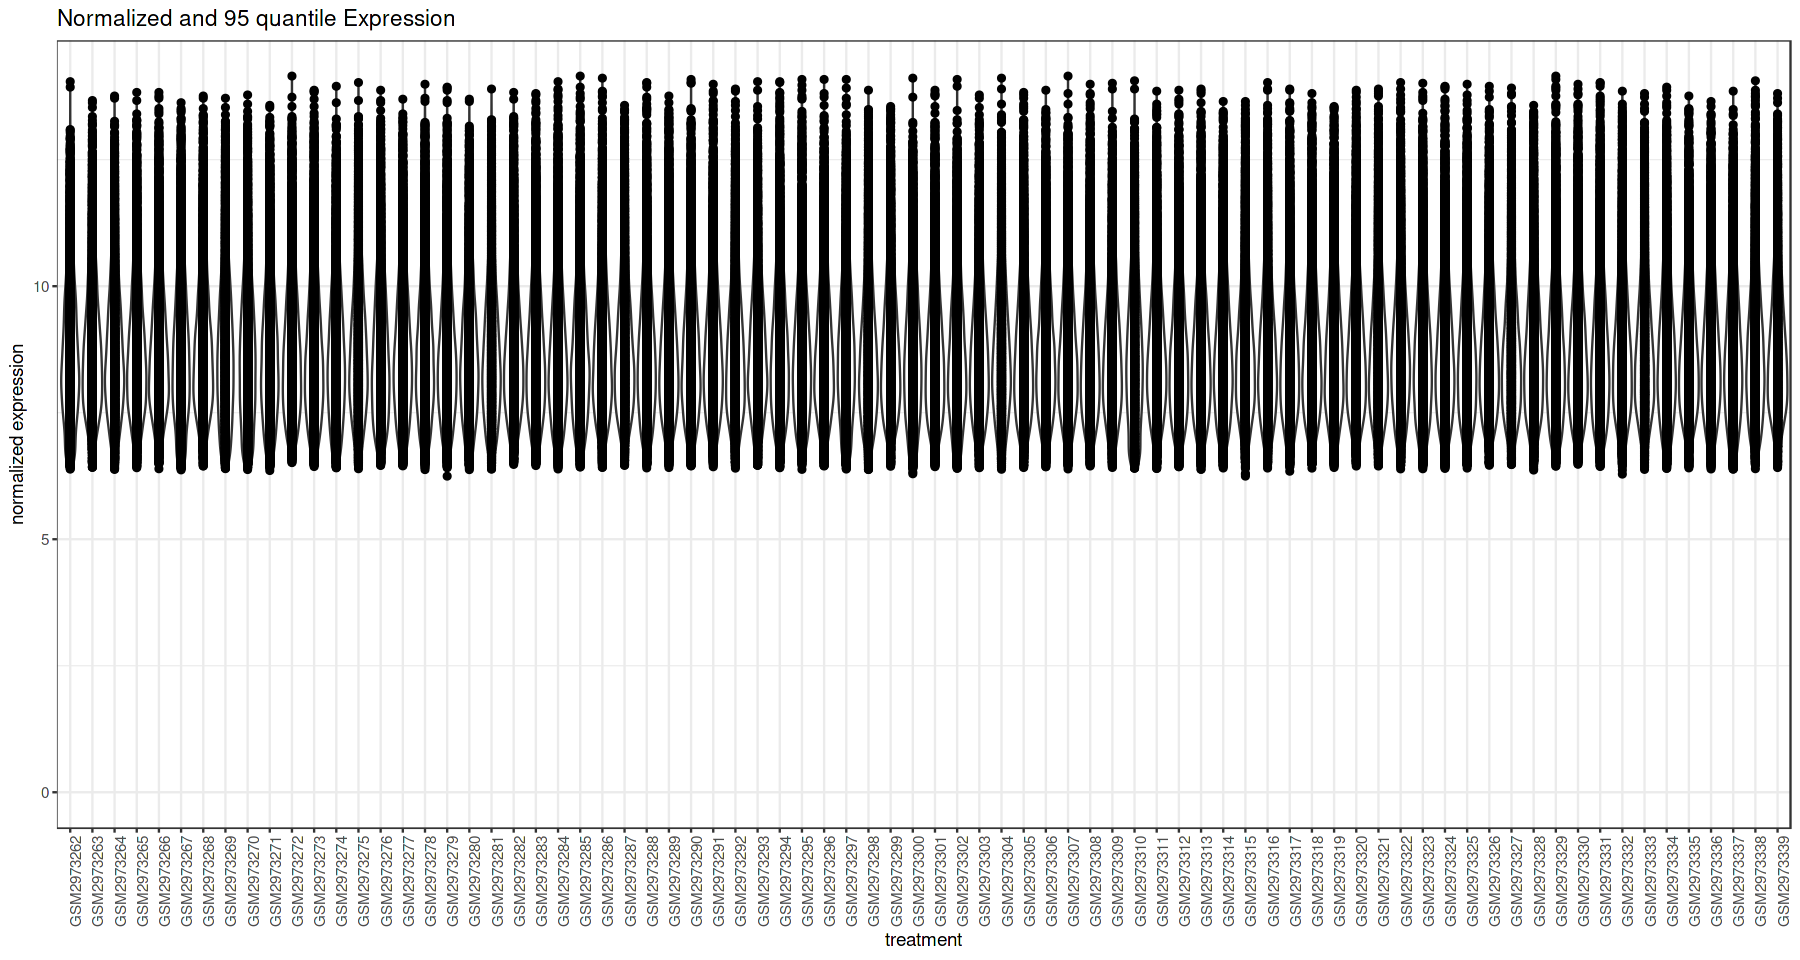

In [18]:
expr_normalized_df <- data.frame(selected) %>%
  mutate(
    Gene_id = row.names(selected)
  ) %>%
  pivot_longer(-Gene_id)

options(repr.plot.width=15, repr.plot.height=8)
expr_normalized_df %>% ggplot(., aes(x = name, y = value)) +
  geom_violin() +
  geom_point() +
  theme_bw() +
  theme(
    axis.text.x = element_text( angle = 90)
  ) +
  ylim(0, NA) +
  labs(
    title = "Normalized and 95 quantile Expression",
    x = "treatment",
    y = "normalized expression"
  )

In [20]:
allowWGCNAThreads()

# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to = 20, by = 2))

# Call the network topology analysis function
sft = pickSoftThreshold(
  data,
  #blockSize = 30,
  powerVector = powers,
  verbose = 5
  )

Allowing multi-threading with up to 32 threads.
pickSoftThreshold: will use block size 4755.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4755 of 4755
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.7990  1.540          0.922  1800.0   1920.00   2700
2      2   0.0359  0.104          0.405   955.0    986.00   1880
3      3   0.3630 -0.420          0.545   582.0    563.00   1410
4      4   0.5800 -0.709          0.707   384.0    341.00   1110
5      5   0.6710 -0.886          0.801   268.0    215.00    892
6      6   0.7310 -1.000          0.855   194.0    141.00    735
7      7   0.7660 -1.100          0.895   144.0     93.90    615
8      8   0.7870 -1.170          0.919   110.0     65.40    522
9      9   0.7970 -1.240          0.936    85.6     46.90    448
10    10   0.8060 -1.290          0.944    67.6     35.00    388
11    12   0.8340 -1.370          0.964    44.0     20.00    298
12    14   0.8490

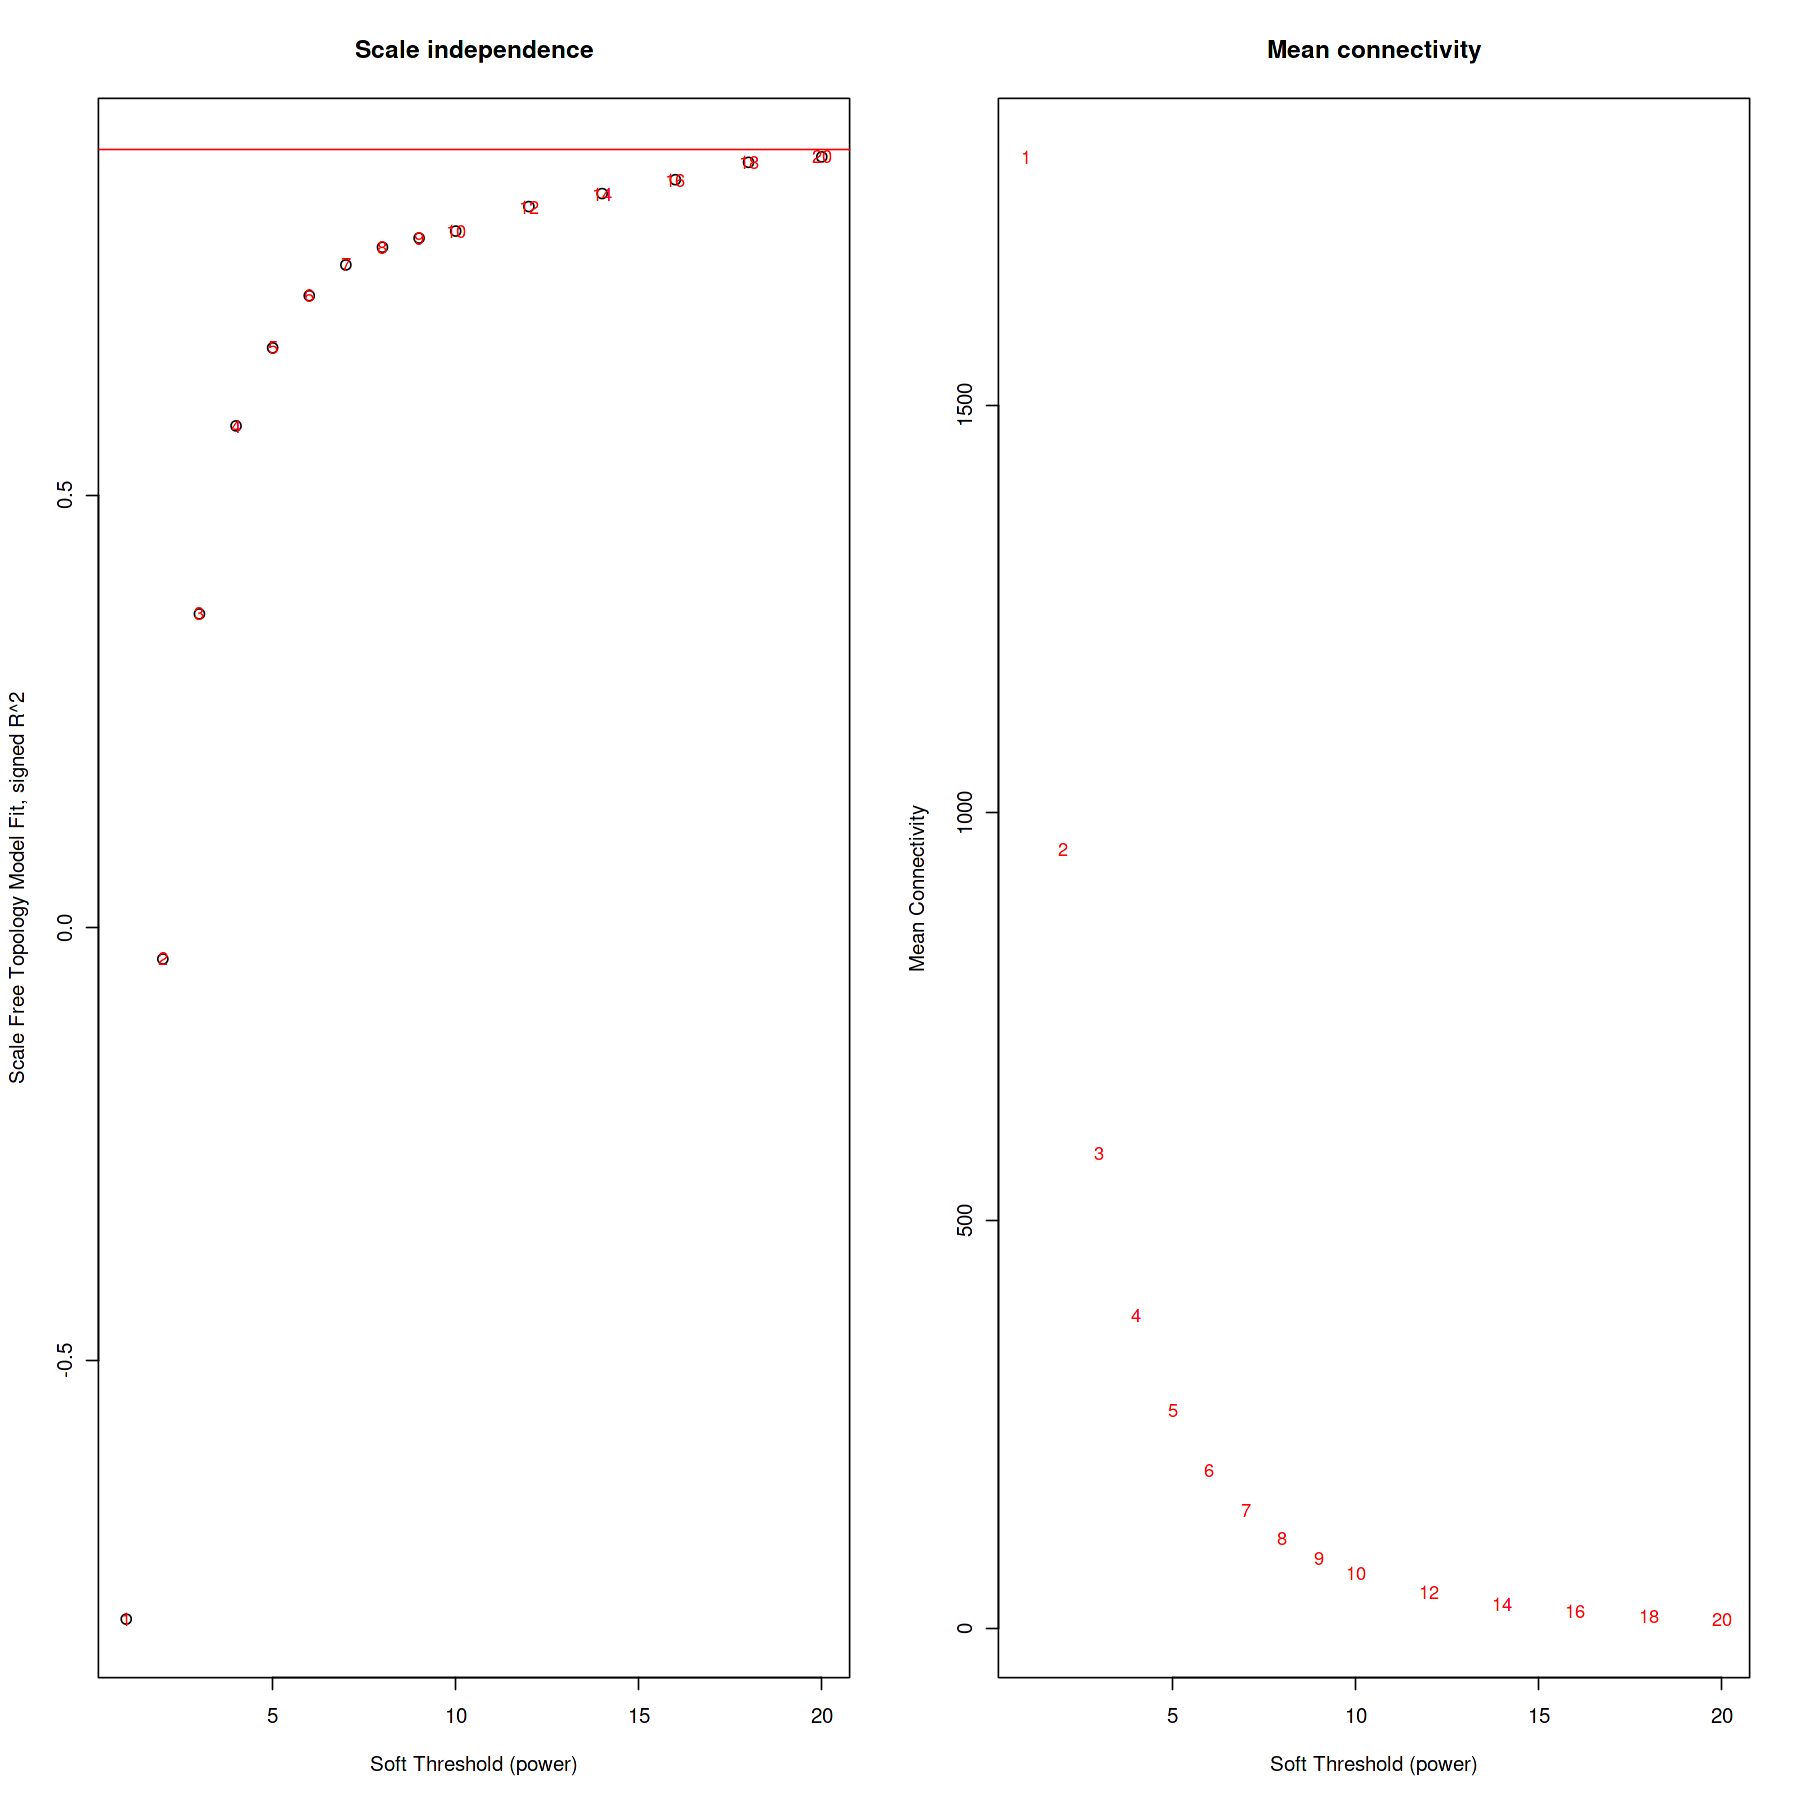

In [21]:
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(1,2));
cex1 = 0.9;
plot(sft$fitIndices[, 1],
     -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
     xlab = "Soft Threshold (power)",
     ylab = "Scale Free Topology Model Fit, signed R^2",
     main = paste("Scale independence")
)
text(sft$fitIndices[, 1],
     -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
     labels = powers, cex = cex1, col = "red"
)
abline(h = 0.90, col = "red")
plot(sft$fitIndices[, 1],
     sft$fitIndices[, 5],
     xlab = "Soft Threshold (power)",
     ylab = "Mean Connectivity",
     type = "n",
     main = paste("Mean connectivity")
)
text(sft$fitIndices[, 1],
     sft$fitIndices[, 5],
     labels = powers,
     cex = cex1, col = "red")

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2 
3542 1213 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 32 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file ER-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 3 genes from module 1 because their KME is too low.
     ..removing 5 genes from module 2 because their KME is too low.
     ..removing 2 genes from module 3 because their KME is too low.
     ..removing 20 genes from module 4 because their KME is too low.
     ..removing 6 g

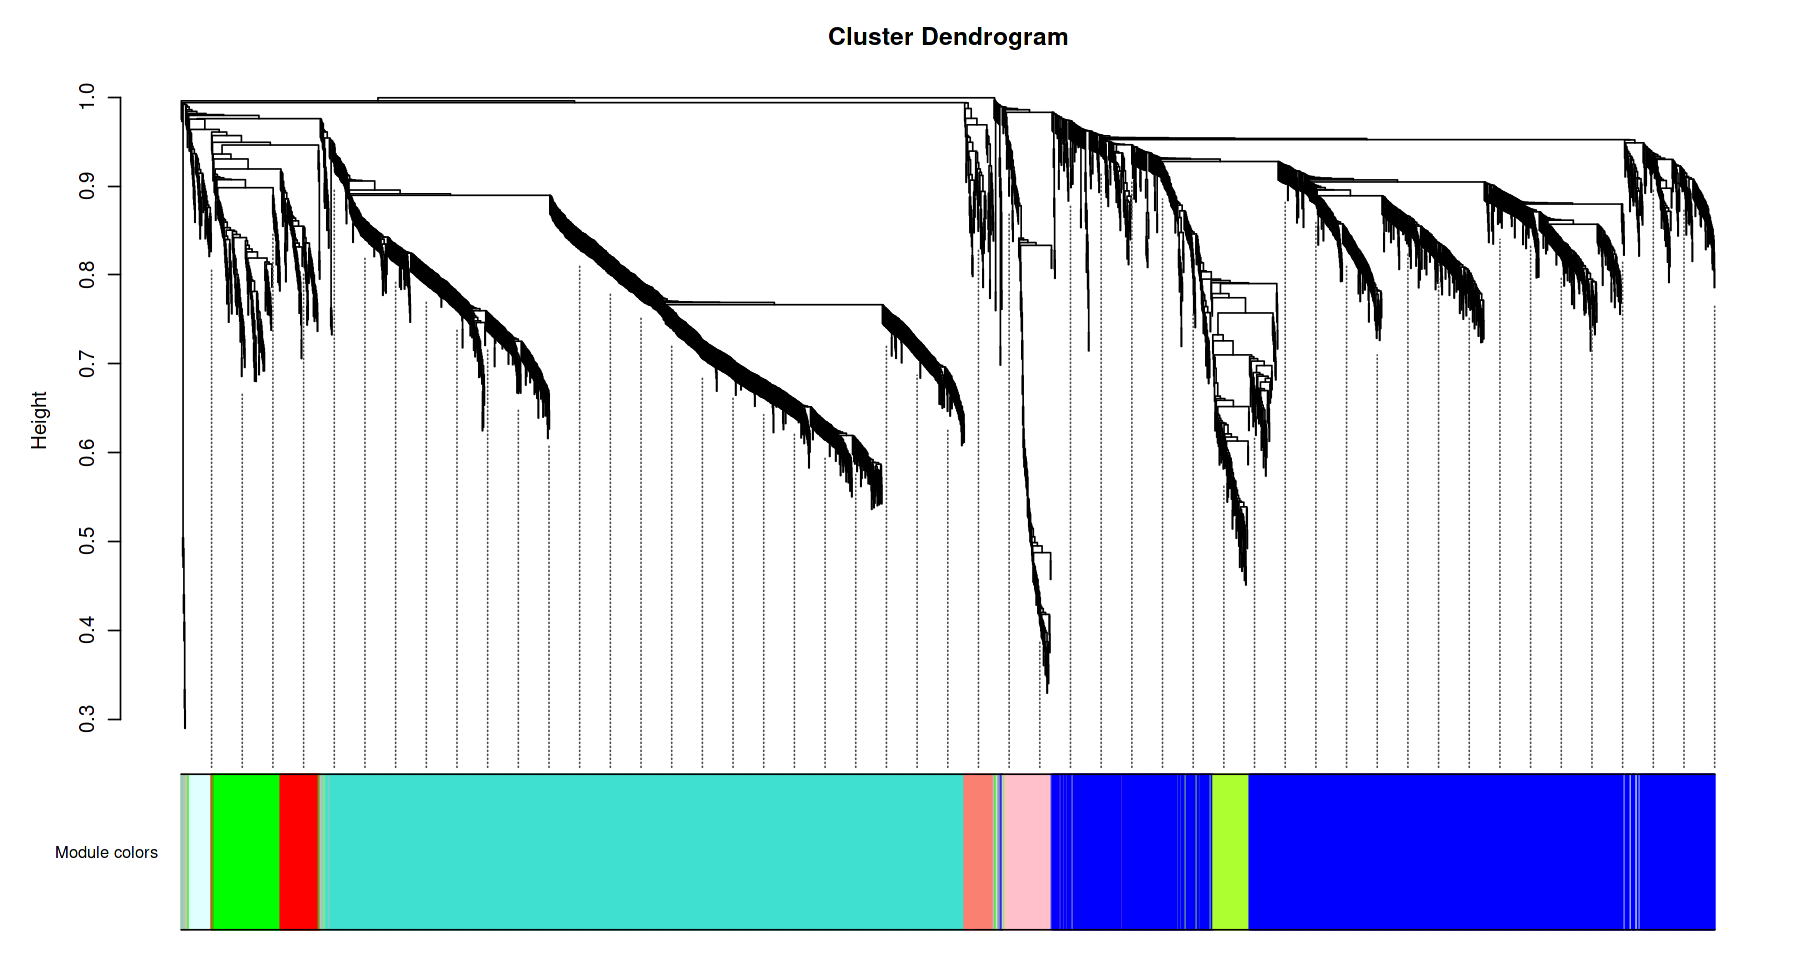

In [22]:
picked_power = 16

# Force it to use WGCNA cor function (fix a namespace conflict issue)
cor <- WGCNA::cor

netwk <- blockwiseModules(
    data,

    # == Adjacency Function ==
    power = picked_power,                # <= power here
    networkType = "signed",
    corFnc='bicor',

    # == Tree and Block Options ==
    deepSplit = 2,
    pamRespectsDendro = F,
    # detectCutHeight = 0.75,
    minModuleSize = 30,
    maxBlockSize = 4000,

    # == Module Adjustments ==
    reassignThreshold = 0,
    mergeCutHeight = 0.25,

    # == TOM == Archive the run results in TOM file (saves time)
    saveTOMs = T,
    saveTOMFileBase = "ER",

    # == Output Options
    numericLabels = T,
    verbose = 3)

# Convert labels to colors for plotting
mergedColors = labels2colors(netwk$colors)
# Plot the dendrogram and the module colors underneath
options(repr.plot.width=15, repr.plot.height=8)
plotDendroAndColors(
  netwk$dendrograms[[1]],
  mergedColors[netwk$blockGenes[[1]]],
  "Module colors",
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05 )


In [23]:
module_df <- data.frame(
  gene_id = names(netwk$colors),
  colors = labels2colors(netwk$colors)
)

write.csv(module_df, file = "../data/gene_modules.txt")

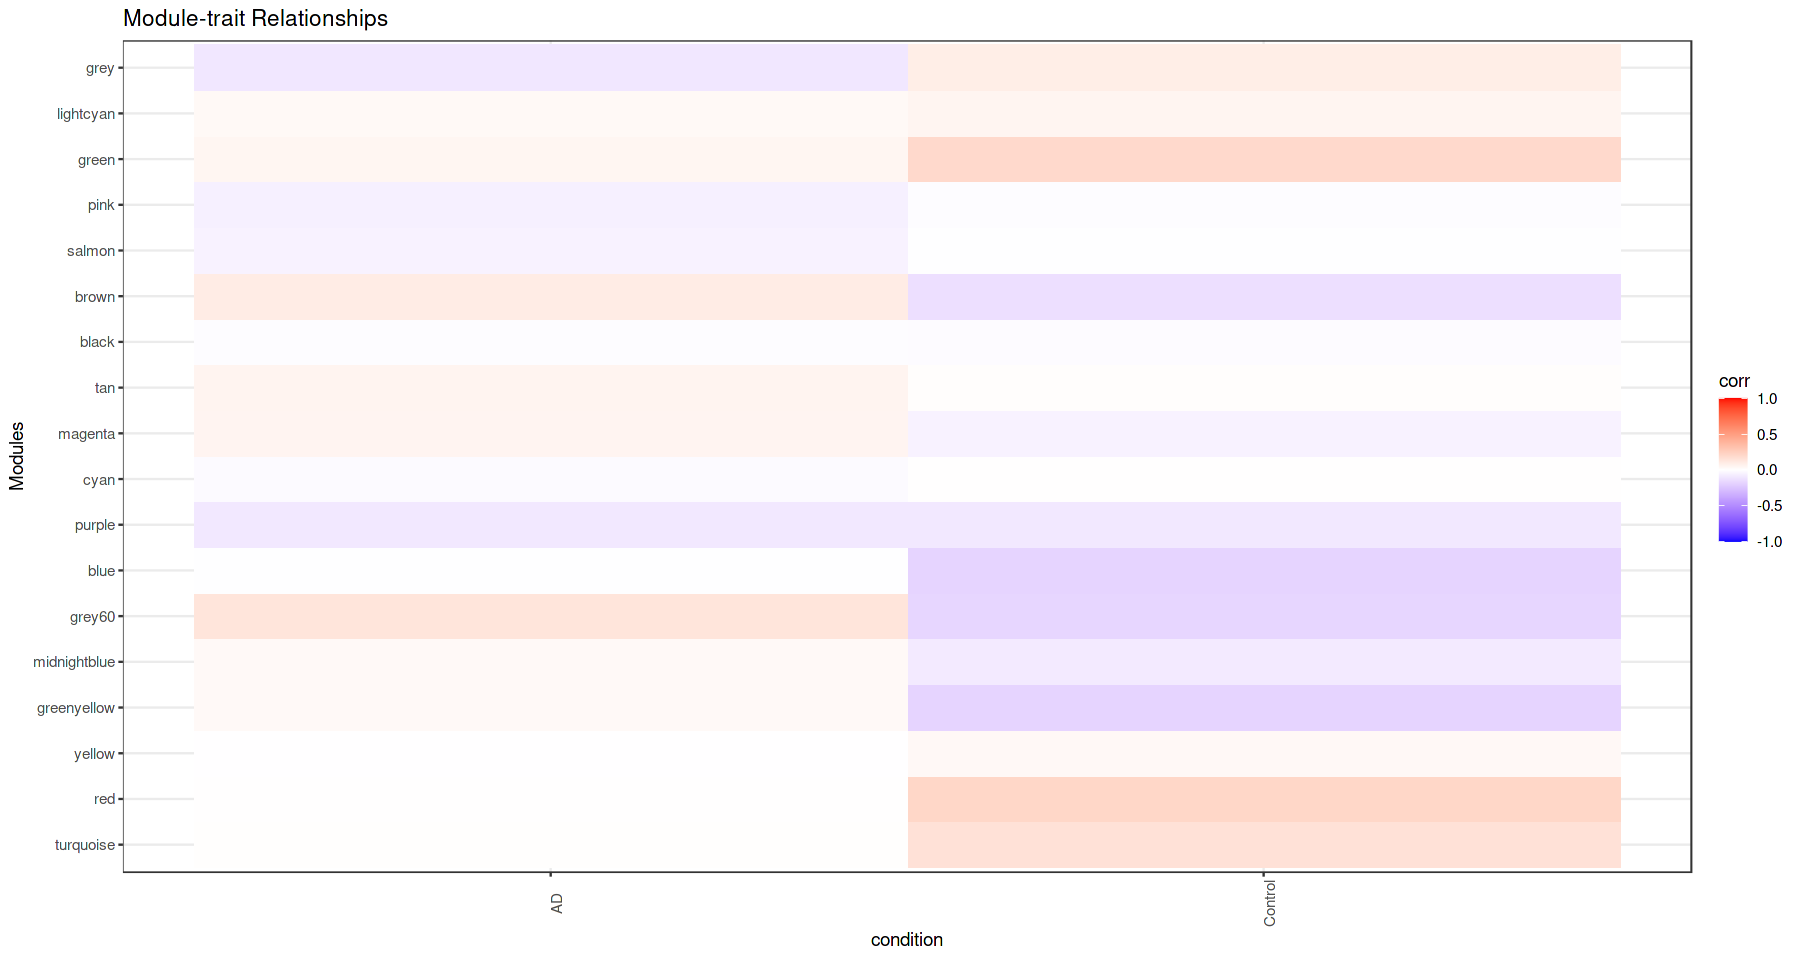

In [24]:
# Get Module Eigengenes per cluster
MEs0 <- moduleEigengenes(data, mergedColors)$eigengenes

# Reorder modules so similar modules are next to each other
MEs0 <- orderMEs(MEs0)
module_order = names(MEs0) %>% gsub("ME","", .)

# Add treatment names
MEs0$treatment = row.names(MEs0)

# tidy & plot data
mME = MEs0 %>%
  pivot_longer(-treatment) %>%
  mutate(
    name = gsub("ME", "", name),
    name = factor(name, levels = module_order)
  )
mME$condition <- sampleInfo[mME$treatment,]$condition
mME %>% ggplot(., aes(x=condition, y=name, fill=value)) +
  geom_tile() +
  theme_bw() +
  scale_fill_gradient2(
    low = "blue",
    high = "red",
    mid = "white",
    midpoint = 0,
    limit = c(-1,1)) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(title = "Module-trait Relationships", y = "Modules", fill="corr")


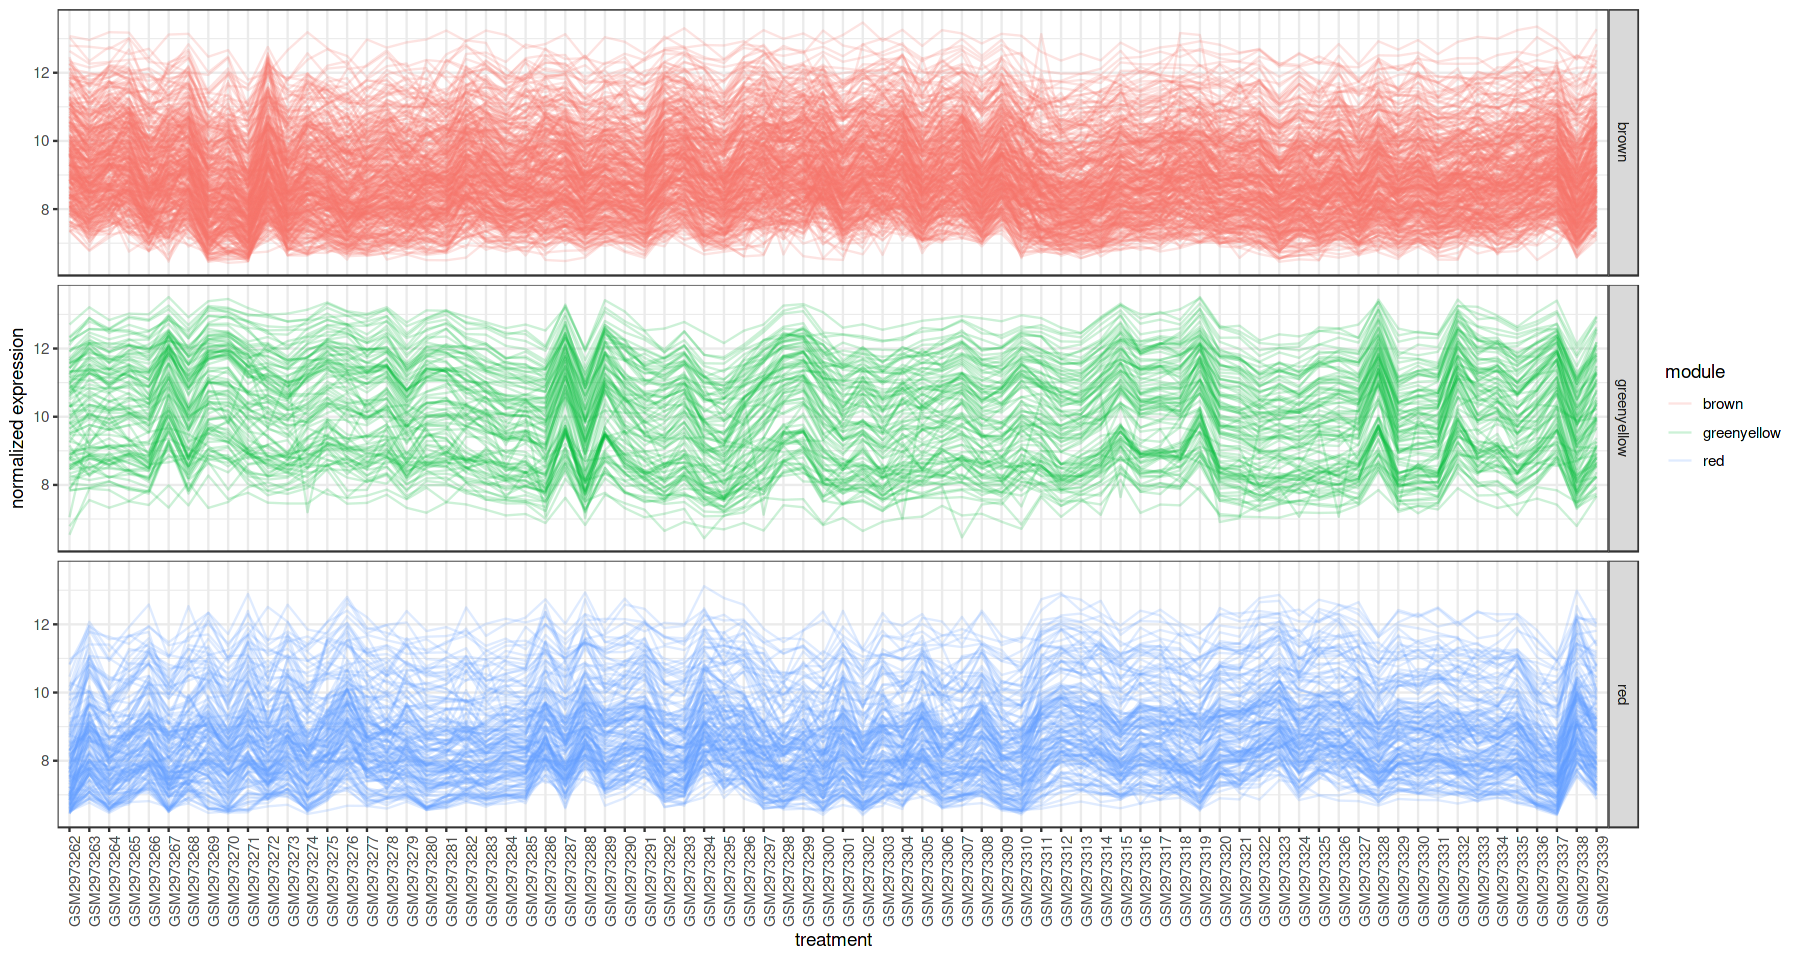

In [29]:
# pick out a few modules of interest here
modules_of_interest = c("red", "brown", "greenyellow")

# Pull out list of genes in that module
submod = module_df %>%
  subset(colors %in% modules_of_interest)

row.names(module_df) = module_df$gene_id

# Get normalized expression for those genes
subexpr = expr_normalized[submod$gene_id,]

submod_df = data.frame(subexpr) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  pivot_longer(-gene_id) %>%
  mutate(
    module = module_df[gene_id,]$colors
  )

submod_df %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "treatment",
       y = "normalized expression")

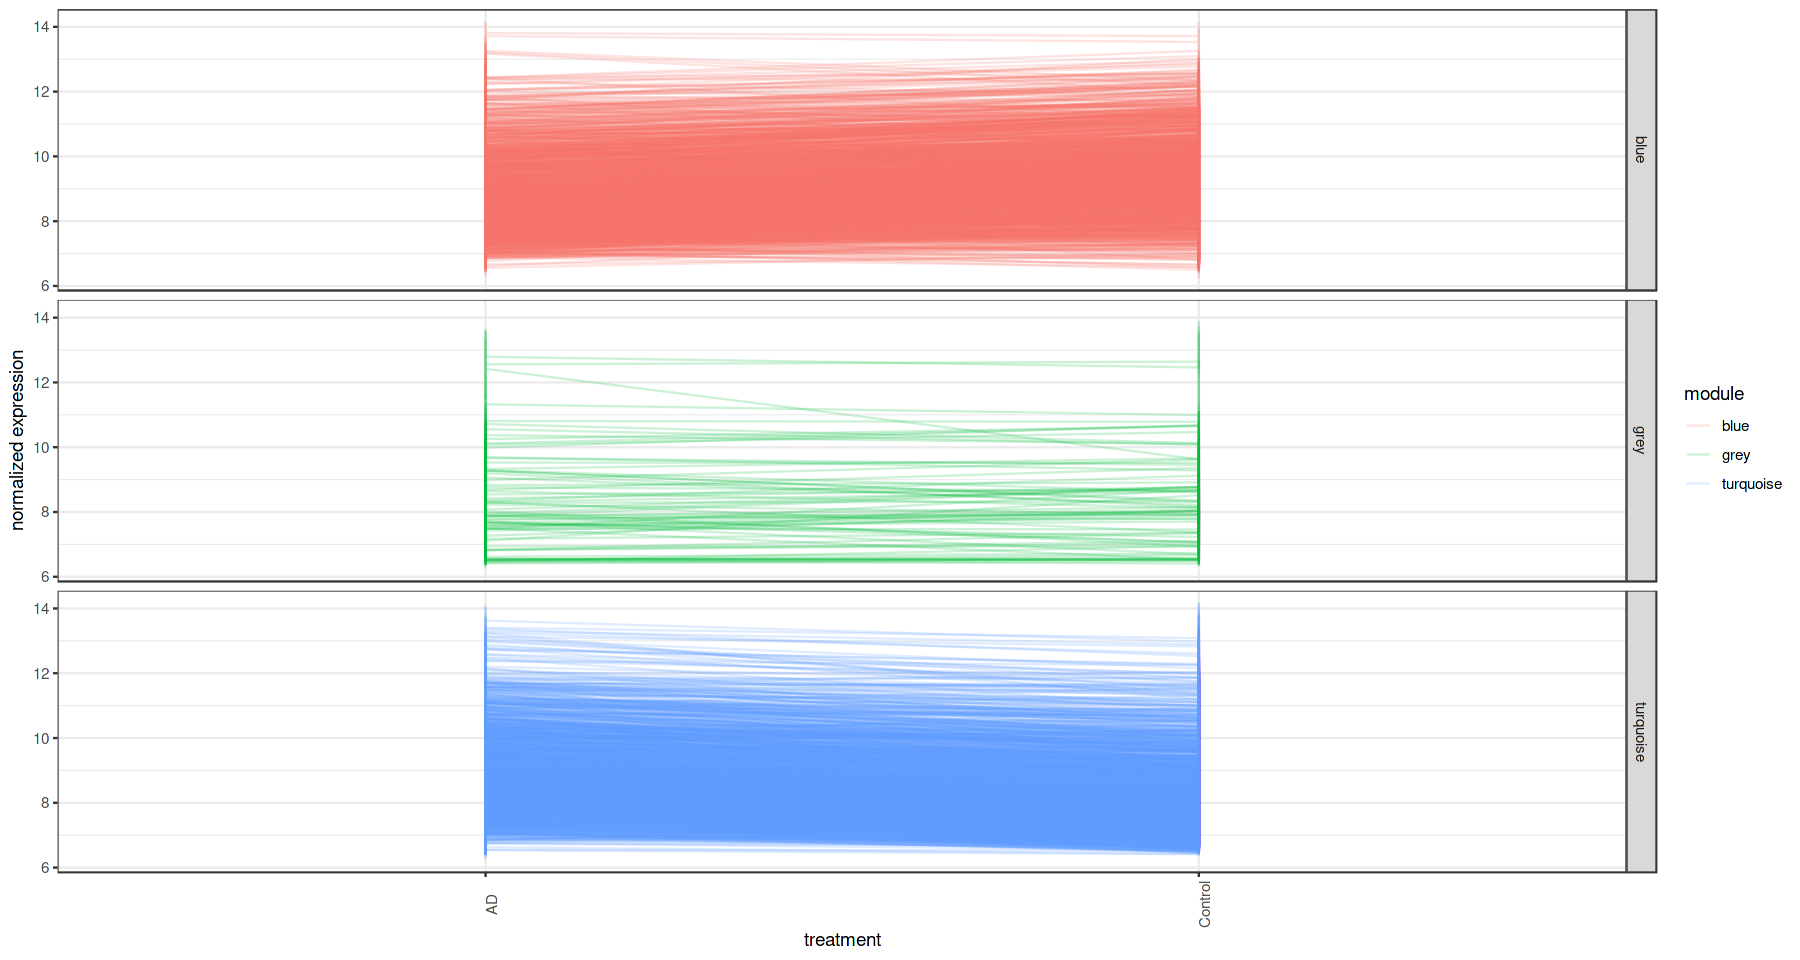

In [30]:
# pick out a few modules of interest here
modules_of_interest = c("grey", "turquoise", "blue")

# Pull out list of genes in that module
submod = module_df %>%
  subset(colors %in% modules_of_interest)

row.names(module_df) = module_df$gene_id

# Get normalized expression for those genes
subexpr = expr_normalized[submod$gene_id,]

submod_df = data.frame(subexpr) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  pivot_longer(-gene_id) %>%
  mutate(
    module = module_df[gene_id,]$colors
  )

submod_df$name <- sampleInfo[submod_df$name,]$condition
submod_df %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "treatment",
       y = "normalized expression")

In [31]:
genes_of_interest = module_df %>%
  subset(colors %in% modules_of_interest)

expr_of_interest = expr_normalized[genes_of_interest$gene_id,]

# Only recalculate TOM for modules of interest (faster, altho there's some online discussion if this will be slightly off)
TOM = TOMsimilarityFromExpr(t(expr_of_interest),
                            power = picked_power)

# Add gene names to row and columns
row.names(TOM) = row.names(expr_of_interest)
colnames(TOM) = row.names(expr_of_interest)

edge_list = data.frame(TOM) %>%
  mutate(
    gene1 = row.names(.)
  ) %>%
  pivot_longer(-gene1) %>%
  dplyr::rename(gene2 = name, correlation = value) %>%
  unique() %>%
  subset(!(gene1==gene2)) %>%
  mutate(
    module1 = module_df[gene1,]$colors,
    module2 = module_df[gene2,]$colors
  )

head(edge_list)

# Export Network file to be read into Cytoscape, VisANT, etc
write.csv(edge_list,file = "../data/edgelist.tsv")

TOM calculation: adjacency..
..will use 32 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


gene1 gene2    correlation  module1   module2  
1 A2BP1 AADACL1  0.1260543581 turquoise turquoise
2 A2BP1 AASDHPPT 0.0835869163 turquoise turquoise
3 A2BP1 ABCA3    0.0003012044 turquoise blue     
4 A2BP1 ABCB10   0.0010554955 turquoise turquoise
5 A2BP1 ABCB7    0.0190479482 turquoise blue     
6 A2BP1 ABCC12   0.0796966977 turquoise turquoise

In [31]:
x <- list(
  DEG = gene_names, 
  WGCNA = module_df$gene_id
)

Loading required package: grid



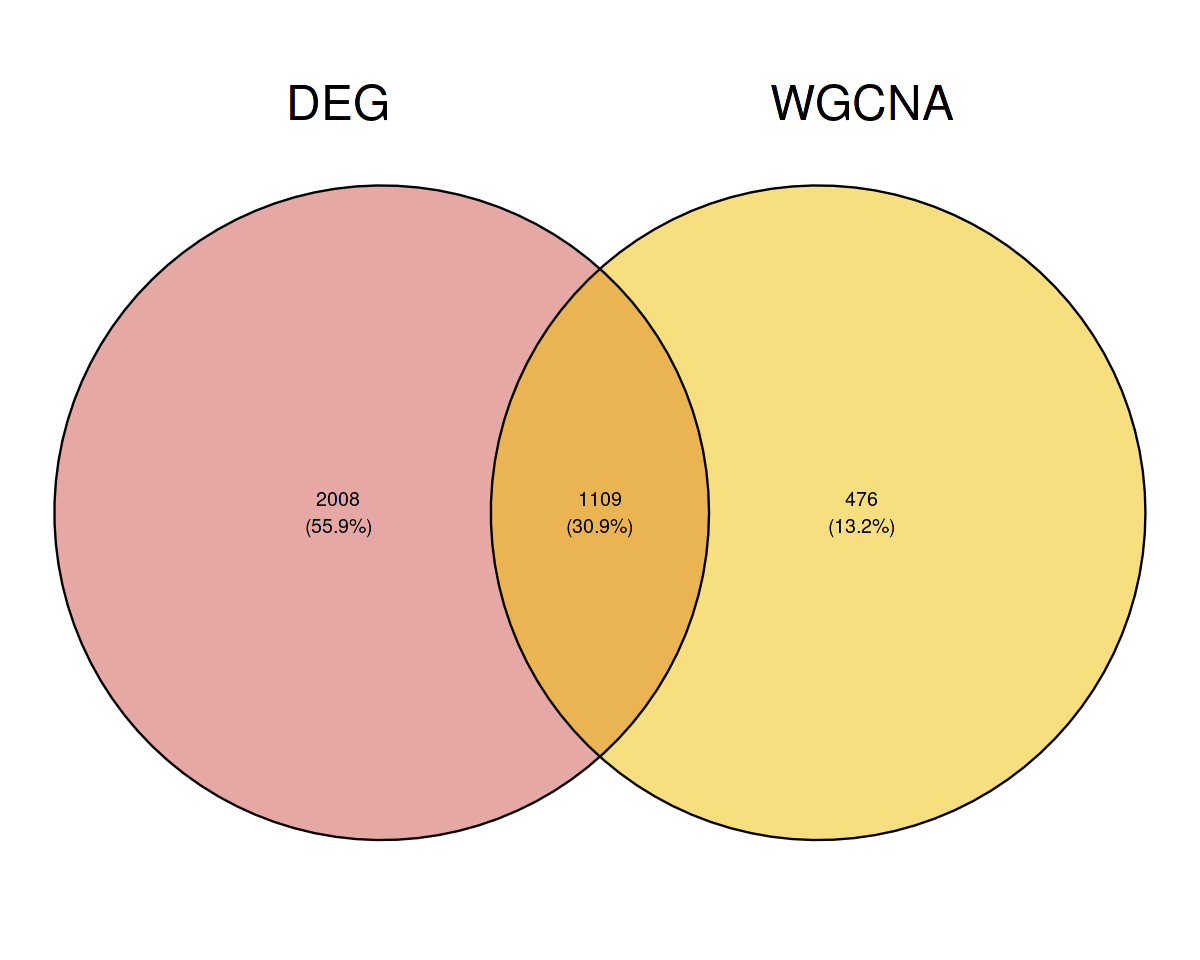

In [92]:
library(ggvenn)
options(repr.plot.width=10, repr.plot.height=8)
ggvenn(
    x, 
    fill_color = c("#CD534CFF", "#EFC000FF", "#868686FF"),
    stroke_size = 0.5, set_name_size = 10
)

In [93]:
saveRDS(full_results, '../data/DMGsLIMMA.Rds')
saveRDS(module_df, '../data/DMGsWGCNA.Rds')

# GEO2R  

## Analysis results:

In [7]:
# group membership for all samples
gsms <- paste0("00000001010100000100011110100101101101000000000001",
        "0100110011111111011100010010")
sml <- strsplit(gsms, split="")[[1]]
# log2 transformation
ex <- exprs(gset)

# assign samples to groups and set up design matrix
gs <- factor(sml)
groups <- make.names(c("AD","Control"))
levels(gs) <- groups
gset$group <- gs
design <- model.matrix(~group + 0, gset)
colnames(design) <- levels(gs)

fit <- lmFit(gset, design)  # fit linear model

#### Set up contrasts of interest and recalculate model coefficients

In [9]:
cts <- paste(groups[1], groups[2], sep="-")
cont.matrix <- makeContrasts(contrasts=cts, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)

In [13]:
# compute statistics and table of top significant genes
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort.by="B", number=250)

tT <- subset(tT, select=c("ID","adj.P.Val","P.Value","t","B","logFC","ORF","SPOT_ID"))
write.table(tT, '../data/DMG.csv', row.names=F, sep="\t")

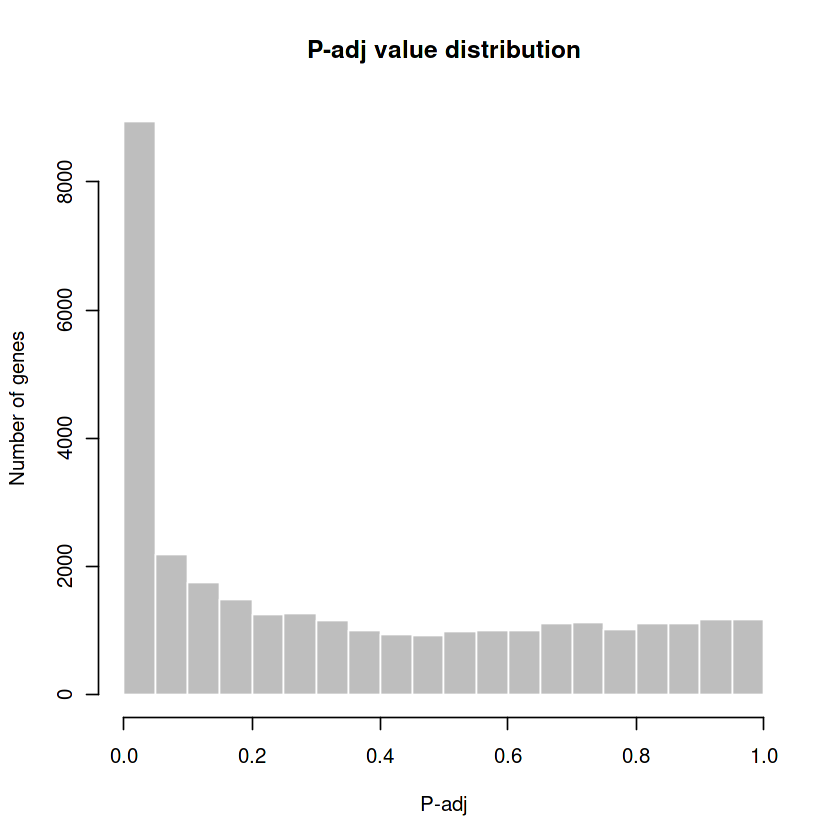

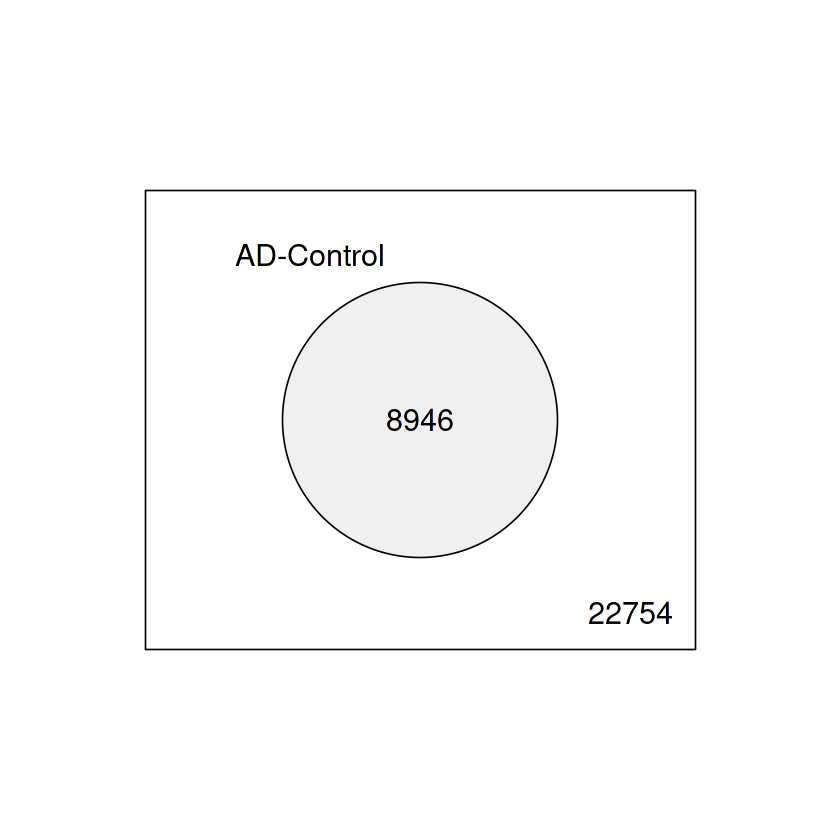

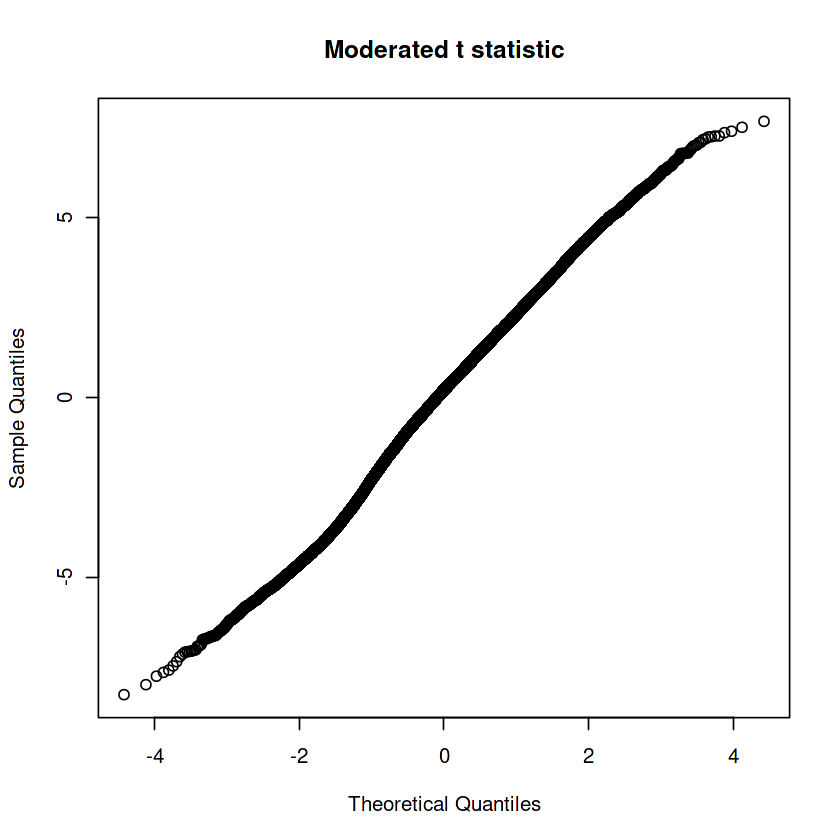

In [15]:
# Visualize and quality control test results.
# Build histogram of P-values for all genes. Normal test
# assumption is that most genes are not differentially expressed.
tT2 <- topTable(fit2, adjust="fdr", sort.by="B", number=Inf)
hist(tT2$adj.P.Val, col = "grey", border = "white", xlab = "P-adj",
  ylab = "Number of genes", main = "P-adj value distribution")

# summarize test results as "up", "down" or "not expressed"
dT <- decideTests(fit2, adjust.method="fdr", p.value=0.05)

# Venn diagram of results
vennDiagram(dT, circle.col=palette())

# create Q-Q plot for t-statistic
t.good <- which(!is.na(fit2$F)) # filter out bad probes
qqt(fit2$t[t.good], fit2$df.total[t.good], main="Moderated t statistic")
